In [ ]:
# Importation des bibliothèques nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import ast
from collections import Counter
import plotly.express as px
from scipy.stats import pearsonr
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from community import community_louvain
from itertools import combinations
from datetime import datetime


# Configurations pour l'affichage
np.set_printoptions(threshold=np.inf)
pd.set_option('display.max_rows', 100)
%matplotlib inline


In [ ]:
# Chargement des datasets
artists_df = pd.read_csv('/content/drive/MyDrive/artists.csv')
tracks_df = pd.read_csv('/content/drive/MyDrive/tracks.csv')

In [ ]:

# Vérifier les dimensions des datasets
print(f"\nDimensions de artists.csv : {artists_df.shape}")
print(f"Dimensions de tracks.csv : {tracks_df.shape}")

# Vérifier les types de colonnes et les valeurs manquantes
print("\nInformations sur artists.csv :")
print(artists_df.info())
print("\nInformations sur tracks.csv :")
print(tracks_df.info())


Dimensions de artists.csv : (1104349, 5)
Dimensions de tracks.csv : (586672, 20)

Informations sur artists.csv :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104349 entries, 0 to 1104348
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   id          1104349 non-null  object 
 1   followers   1104336 non-null  float64
 2   genres      1104349 non-null  object 
 3   name        1104346 non-null  object 
 4   popularity  1104349 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 42.1+ MB
None

Informations sur tracks.csv :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       

In [ ]:
# Nettoyage des genres : convertir les chaînes en listes et supprimer les listes vides
def process_genres(genre_str):
    try:
        genres = ast.literal_eval(genre_str)  # Convertir la chaîne en liste
        return genres if genres else None  # Garder les genres non vides
    except:
        return None

artists_df['genres'] = artists_df['genres'].apply(process_genres)

# Supprimer les lignes avec des genres manquants (None)
artists_df = artists_df.dropna(subset=['genres'])

# Supprimer les autres lignes avec des valeurs manquantes
artists_df = artists_df.dropna()

# Aperçu des données nettoyées
print(f"Dimensions de artists.csv après nettoyage : {artists_df.shape}")
print(f"Dimensions de tracks.csv (inchangées) : {tracks_df.shape}")


Dimensions de artists.csv après nettoyage : (298609, 5)
Dimensions de tracks.csv (inchangées) : (586672, 20)


In [ ]:
# Vérifier les premières lignes
print("\nPremières lignes de artists.csv après nettoyage :")
print(artists_df.head())

print("\nPremières lignes de tracks.csv :")
print(tracks_df.head())


Premières lignes de artists.csv après nettoyage :
                         id  followers                  genres  \
45   0VLMVnVbJyJ4oyZs2L3Yl2       71.0        [carnaval cadiz]   
46   0dt23bs4w8zx154C5xdVyl       63.0        [carnaval cadiz]   
47   0pGhoB99qpEJEsBQxgaskQ       64.0        [carnaval cadiz]   
48   3HDrX2OtSuXLW5dLR85uN3       53.0        [carnaval cadiz]   
136  22mLrN5fkppmuUPsHx6i2G       59.0  [classical harp, harp]   

                             name  popularity  
45   Las Viudas De Los Bisabuelos           6  
46              Los De Capuchinos           5  
47             Los “Pofesionales”           7  
48      Los Que No Paran De Rajar           6  
136                   Vera Dulova           3  

Premières lignes de tracks.csv :
                       id                                 name  popularity  \
0  35iwgR4jXetI318WEWsa1Q                                Carve           6   
1  021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista           0

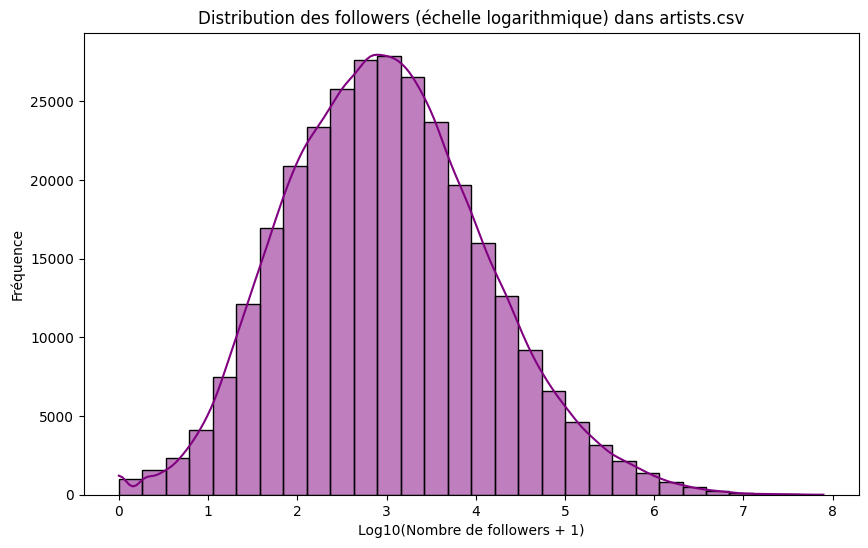

In [ ]:
# Appliquer une transformation logarithmique sur les followers
artists_df['log_followers'] = np.log10(artists_df['followers'] + 1)  # Ajouter 1 pour éviter log(0)

# Réafficher la distribution des followers en échelle logarithmique
plt.figure(figsize=(10, 6))
sns.histplot(artists_df['log_followers'], kde=True, bins=30, color='purple')
plt.title('Distribution des followers (échelle logarithmique) dans artists.csv')
plt.xlabel('Log10(Nombre de followers + 1)')
plt.ylabel('Fréquence')
plt.show()


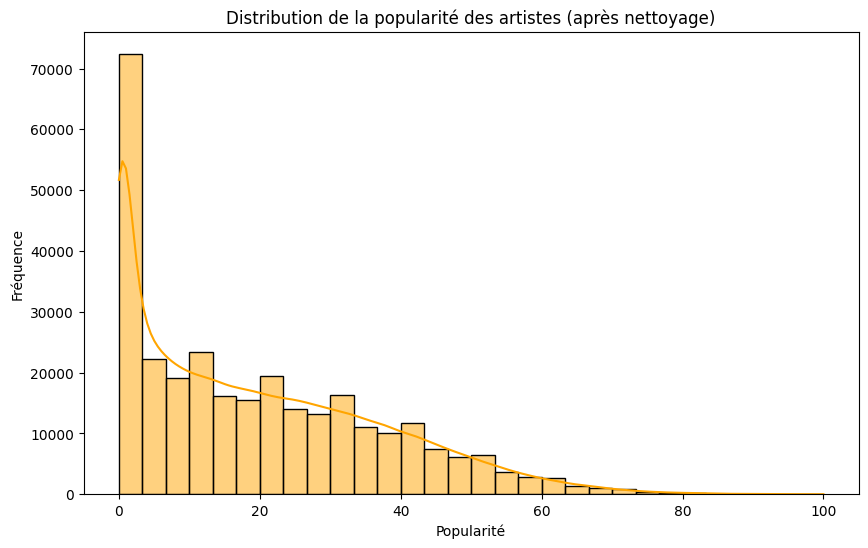

In [ ]:
# Distribution des popularités
plt.figure(figsize=(10, 6))
sns.histplot(artists_df['popularity'], kde=True, bins=30, color='orange')
plt.title('Distribution de la popularité des artistes (après nettoyage)')
plt.xlabel('Popularité')
plt.ylabel('Fréquence')
plt.show()


Top 10 des artistes les plus populaires :
                 name  popularity   followers
144481  Justin Bieber         100  44606973.0
115489      Bad Bunny          98  32244734.0
126338   Taylor Swift          98  38869193.0
313676          Drake          98  54416812.0
115490     Juice WRLD          96  16996777.0
144483     The Weeknd          96  31308207.0
144484            BTS          96  31623813.0
144486       J Balvin          95  27286822.0
115491    Myke Towers          95   5001808.0
144487       Dua Lipa          95  24123468.0

Top 10 des artistes avec le plus de followers :
                   name  popularity   followers
144138       Ed Sheeran          92  78900234.0
144485    Ariana Grande          95  61301006.0
313676            Drake          98  54416812.0
144481    Justin Bieber         100  44606973.0
144488           Eminem          94  43747833.0
313508          Rihanna          92  42244011.0
126658    Billie Eilish          92  41792604.0
126338     Taylor 

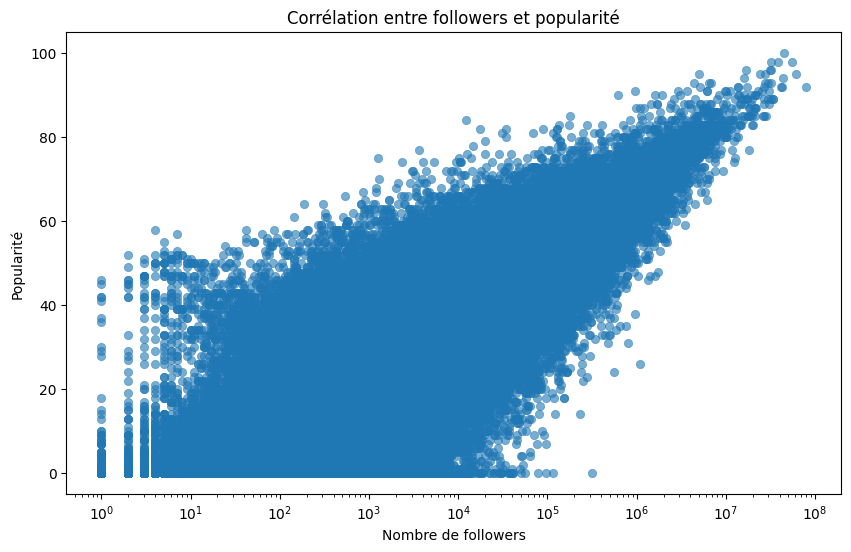

<ipython-input-21-3f141bc4ecc6>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_artists_popularity, x='popularity', y='name', palette='viridis')


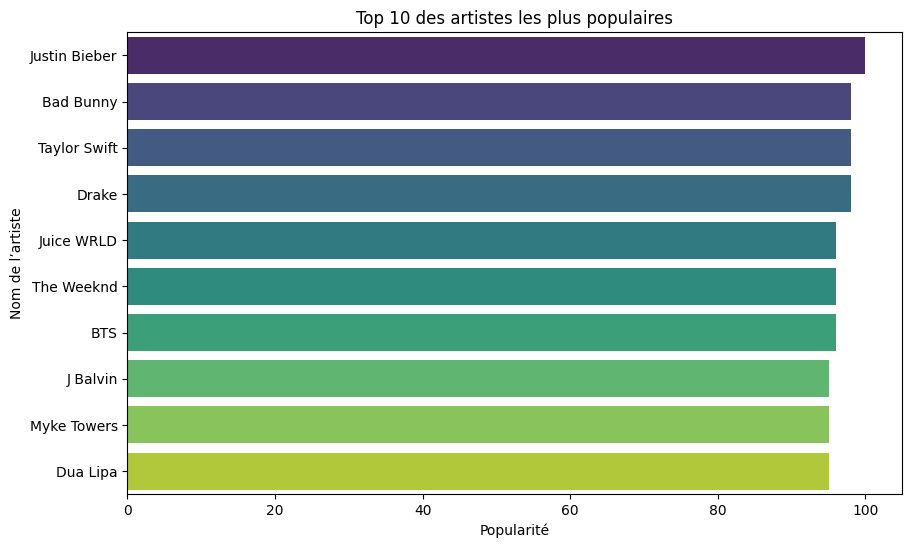

<ipython-input-21-3f141bc4ecc6>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_artists_followers, x='followers', y='name', palette='magma')


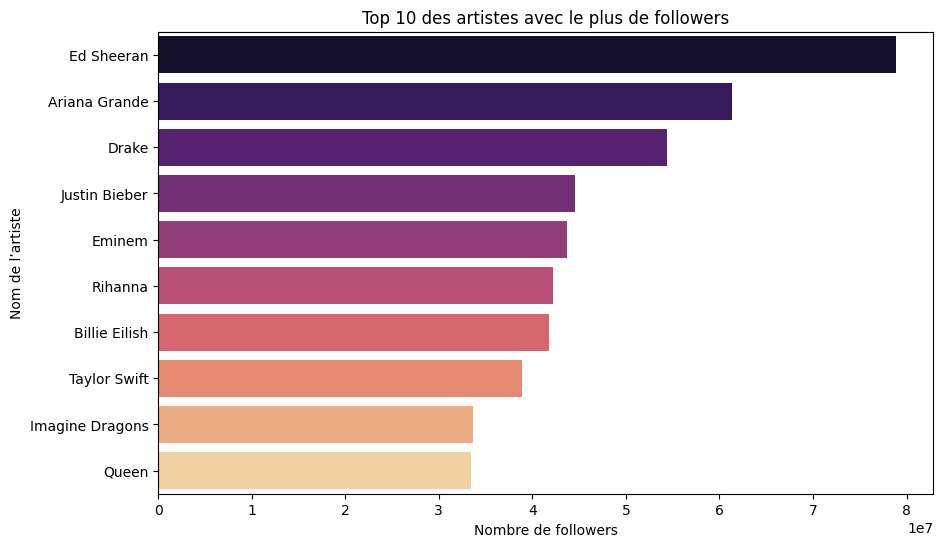

In [ ]:
# --- Analyse des artistes les plus populaires ---

# Trier les artistes par popularité
top_artists_popularity = artists_df.sort_values(by='popularity', ascending=False).head(10)
print("\nTop 10 des artistes les plus populaires :")
print(top_artists_popularity[['name', 'popularity', 'followers']])

# Trier les artistes par nombre de followers
top_artists_followers = artists_df.sort_values(by='followers', ascending=False).head(10)
print("\nTop 10 des artistes avec le plus de followers :")
print(top_artists_followers[['name', 'popularity', 'followers']])

# Corrélation entre followers et popularité
correlation = artists_df[['followers', 'popularity']].corr()
print("\nCorrélation entre followers et popularité :")
print(correlation)

# Visualisation : Popularité vs Followers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=artists_df, x='followers', y='popularity', alpha=0.6, edgecolor=None)
plt.title('Corrélation entre followers et popularité')
plt.xlabel('Nombre de followers')
plt.ylabel('Popularité')
plt.xscale('log')  # Échelle logarithmique pour les followers (large gamme de valeurs)
plt.show()

# Visualisation : Top 10 artistes par popularité
plt.figure(figsize=(10, 6))
sns.barplot(data=top_artists_popularity, x='popularity', y='name', palette='viridis')
plt.title('Top 10 des artistes les plus populaires')
plt.xlabel('Popularité')
plt.ylabel('Nom de l’artiste')
plt.show()

# Visualisation : Top 10 artistes par followers
plt.figure(figsize=(10, 6))
sns.barplot(data=top_artists_followers, x='followers', y='name', palette='magma')
plt.title('Top 10 des artistes avec le plus de followers')
plt.xlabel('Nombre de followers')
plt.ylabel('Nom de l’artiste')
plt.show()


In [ ]:
# --- Analyse des morceaux populaires ---

# Trier les morceaux par popularité
top_tracks_popularity = tracks_df.sort_values(by='popularity', ascending=False).head(10)
print("\nTop 10 des morceaux les plus populaires :")
print(top_tracks_popularity[['name', 'popularity', 'duration_ms', 'artists']])

# Statistiques descriptives des colonnes importantes
columns_of_interest = ['popularity', 'danceability', 'energy', 'duration_ms', 'valence']
print("\nStatistiques descriptives des morceaux :")
print(tracks_df[columns_of_interest].describe())



Top 10 des morceaux les plus populaires :
                                         name  popularity  duration_ms  \
93802  Peaches (feat. Daniel Caesar & Giveon)         100       198082   
93803                         drivers license          99       242014   
93804                  Astronaut In The Ocean          98       132780   
92810                         Save Your Tears          97       215627   
92811                               telepatía          97       160191   
93805                     Leave The Door Open          96       242096   
92813                         Blinding Lights          96       200040   
92814                            The Business          95       164000   
92816                  Heartbreak Anniversary          94       198371   
92819                                 Bandido          94       232853   

                                              artists  
93802    ['Justin Bieber', 'Daniel Caesar', 'Giveon']  
93803                         

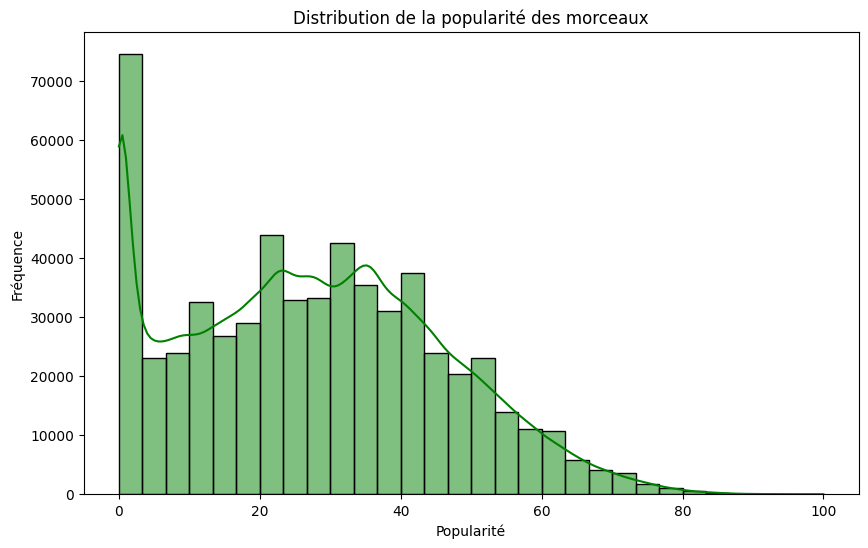

In [ ]:

# Distribution de la popularité
plt.figure(figsize=(10, 6))
sns.histplot(tracks_df['popularity'], kde=True, bins=30, color='green')
plt.title('Distribution de la popularité des morceaux')
plt.xlabel('Popularité')
plt.ylabel('Fréquence')
plt.show()


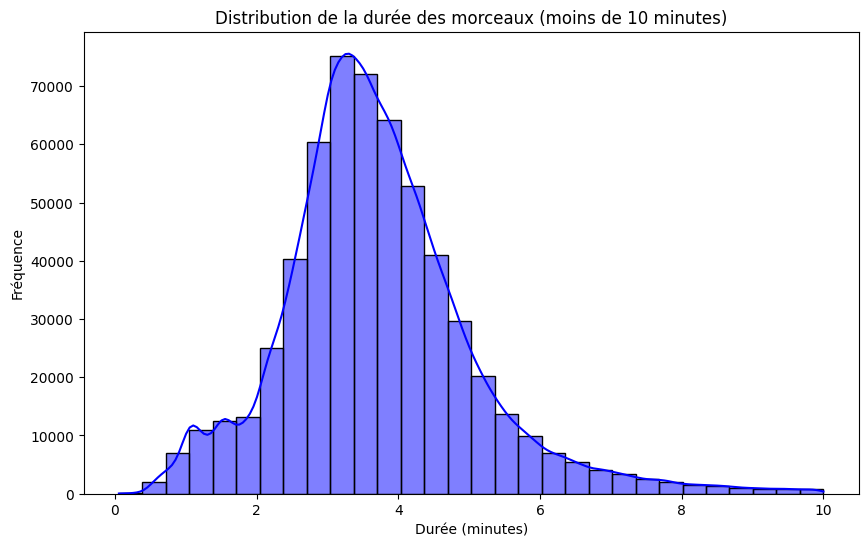

In [ ]:
# Filtrer les morceaux avec une durée inférieure à 10 minutes (600000 ms)
filtered_tracks = tracks_df[tracks_df['duration_ms'] <= 600000]

# Distribution de la durée des morceaux filtrés
plt.figure(figsize=(10, 6))
sns.histplot(filtered_tracks['duration_ms'] / 60000, kde=True, bins=30, color='blue')
plt.title('Distribution de la durée des morceaux (moins de 10 minutes)')
plt.xlabel('Durée (minutes)')
plt.ylabel('Fréquence')
plt.show()





In [ ]:
# Analyse des caractéristiques des morceaux populaires
top_popular_tracks = tracks_df[tracks_df['popularity'] >= tracks_df['popularity'].quantile(0.9)]
top_popular_tracks['duration_min'] = top_popular_tracks['duration_ms'] / 60000
# Mettre à jour les colonnes d'intérêt pour inclure la durée en minutes et exclure la durée en millisecondes
columns_of_interest = ['popularity', 'danceability', 'energy', 'duration_min', 'valence']

print(f"\nNombre de morceaux populaires (top 10%) : {len(top_popular_tracks)}")



Nombre de morceaux populaires (top 10%) : 63580


<ipython-input-9-ecad56979534>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_popular_tracks['duration_min'] = top_popular_tracks['duration_ms'] / 60000


In [ ]:
# Moyennes des caractéristiques des morceaux populaires
top_tracks_stats = top_popular_tracks[columns_of_interest].mean()
print("\nMoyenne des caractéristiques des morceaux populaires (top 10%) :")
print(top_tracks_stats)


Moyenne des caractéristiques des morceaux populaires (top 10%) :
popularity      60.130072
danceability     0.619235
energy           0.635429
duration_min     3.806401
valence          0.529327
dtype: float64


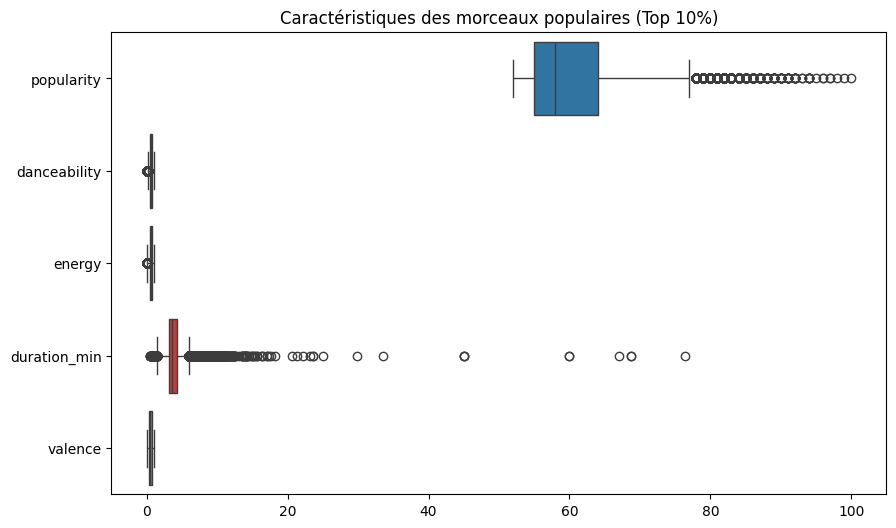

In [ ]:
# Visualisation des caractéristiques des morceaux populaires
plt.figure(figsize=(10, 6))
sns.boxplot(data=top_popular_tracks[columns_of_interest], orient="h")
plt.title("Caractéristiques des morceaux populaires (Top 10%)")
plt.show()

In [ ]:
# Extraire la liste des id_artists pour chaque morceau populaire
top_popular_tracks['id_artists_list'] = top_popular_tracks['id_artists'].apply(ast.literal_eval)

# Récupérer un dictionnaire de genres pour chaque artiste dans artists_df
artist_genre_dict = dict(zip(artists_df['id'], artists_df['genres']))

# Fonction pour obtenir les genres d'un morceau en combinant les genres de tous les artistes impliqués
def get_track_genres(artist_ids):
    genres = []
    for artist_id in artist_ids:
        if artist_id in artist_genre_dict:
            genres.extend(artist_genre_dict[artist_id])
    return list(set(genres))  # Utiliser set pour éviter les doublons


<ipython-input-34-8a385559e8c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_popular_tracks['id_artists_list'] = top_popular_tracks['id_artists'].apply(ast.literal_eval)


In [ ]:
# Appliquer la fonction pour créer une nouvelle colonne 'genres' dans top_popular_tracks
top_popular_tracks['genres'] = top_popular_tracks['id_artists_list'].apply(get_track_genres)


<ipython-input-35-0e219cd0850d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_popular_tracks['genres'] = top_popular_tracks['id_artists_list'].apply(get_track_genres)


In [ ]:
# Compter les genres les plus fréquents
all_genres = [genre for sublist in top_popular_tracks['genres'] for genre in sublist]
genre_counts = Counter(all_genres)
# Afficher les 10 genres les plus fréquents parmi les morceaux populaires
top_genres = genre_counts.most_common(10)
print("\nTop 10 genres les plus fréquents parmi les morceaux populaires :")
for genre, count in top_genres:
    print(f"{genre}: {count}")



Top 10 genres les plus fréquents parmi les morceaux populaires :
pop: 7736
dance pop: 6222
rock: 5665
latin: 4520
post-teen pop: 4015
rap: 3796
pop rap: 3710
hip hop: 3409
latin pop: 3174
classic rock: 2626


<ipython-input-39-fe060ad74fc6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[count for genre, count in top_genres], y=[genre for genre, count in top_genres], palette="viridis")


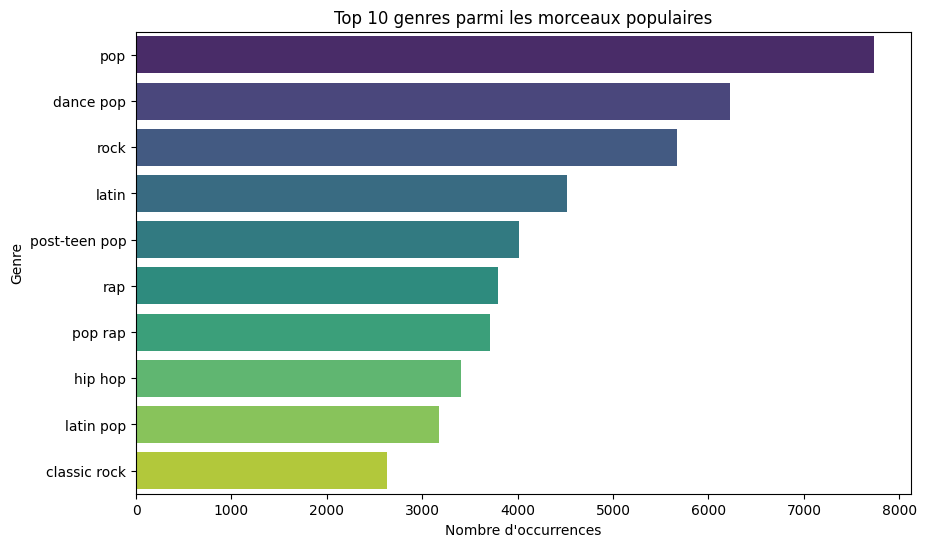

In [ ]:
# Visualisation des genres les plus fréquents
plt.figure(figsize=(10, 6))
sns.barplot(x=[count for genre, count in top_genres], y=[genre for genre, count in top_genres], palette="viridis")
plt.title("Top 10 genres parmi les morceaux populaires")
plt.xlabel("Nombre d'occurrences")
plt.ylabel("Genre")
plt.show()


In [ ]:
# Analyser la diversité des genres dans les morceaux populaires
num_unique_genres = len(set(all_genres))
print(f"\nNombre de genres uniques parmi les morceaux populaires (Top 10%) : {num_unique_genres}")



Nombre de genres uniques parmi les morceaux populaires (Top 10%) : 3069


<ipython-input-41-068e3ba6b82a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_popular_tracks['num_genres'] = top_popular_tracks['genres'].apply(len)


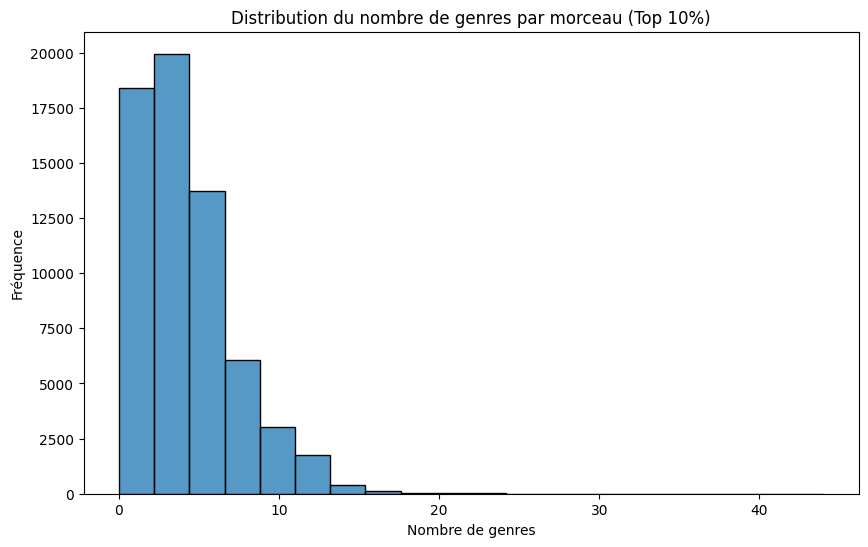

In [ ]:
# Distribution des genres par morceau
top_popular_tracks['num_genres'] = top_popular_tracks['genres'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(top_popular_tracks['num_genres'], bins=20, kde=False)
plt.title("Distribution du nombre de genres par morceau (Top 10%)")
plt.xlabel("Nombre de genres")
plt.ylabel("Fréquence")
plt.show()

In [ ]:
# Convertir la colonne 'release_date' en type datetime
tracks_df['release_date'] = pd.to_datetime(tracks_df['release_date'], errors='coerce')

# Extraire l'année et le mois de la date de sortie
tracks_df['release_year'] = tracks_df['release_date'].dt.year
tracks_df['release_month'] = tracks_df['release_date'].dt.to_period('M')

# Filtrer les morceaux sortis après une certaine année (par exemple 2000) pour réduire la portée
filtered_tracks = tracks_df[(tracks_df['release_year'] >= 2000) & (tracks_df['release_year'] <= 2020)]


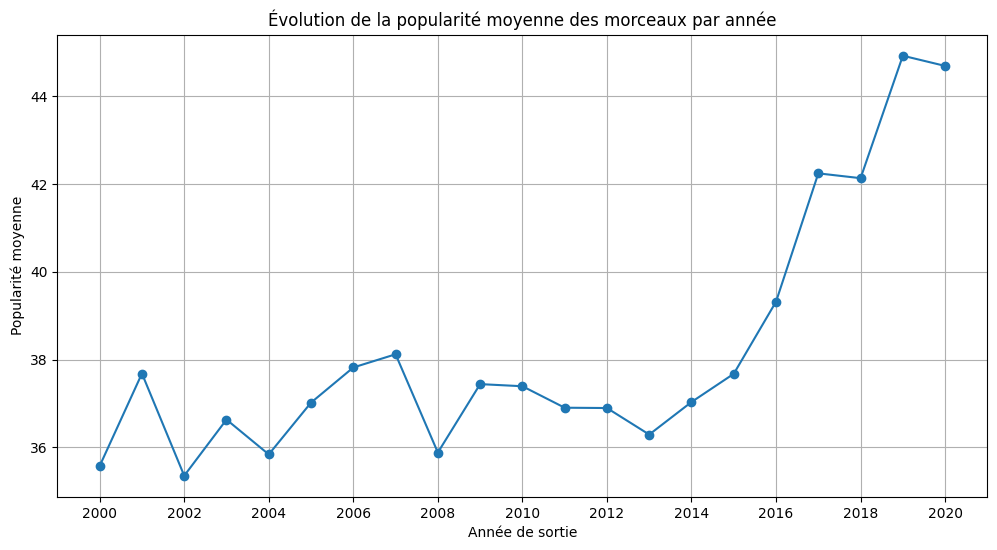

In [ ]:
# Évolution de la popularité moyenne des morceaux par année
popularity_trend = filtered_tracks.groupby('release_year')['popularity'].mean()
# Visualisation de la popularité moyenne des morceaux par année
plt.figure(figsize=(12, 6))
popularity_trend.plot(kind='line', marker='o')
plt.title("Évolution de la popularité moyenne des morceaux par année")
plt.xlabel("Année de sortie")
plt.ylabel("Popularité moyenne")
plt.grid(True)
plt.xticks(range(2000, 2021, 2))
plt.show()


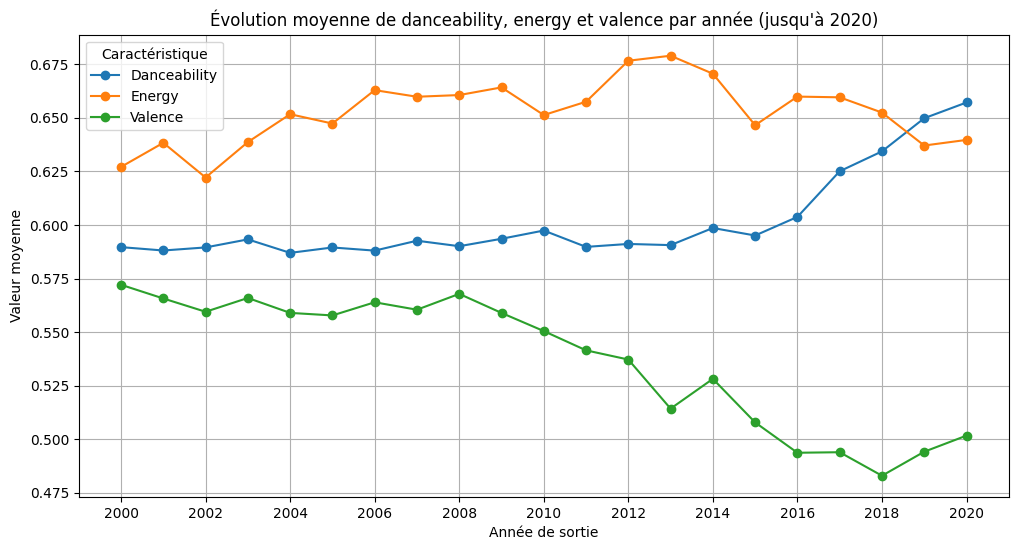

In [ ]:
# Analyser les tendances de caractéristiques spécifiques par année jusqu'en 2020
characteristics = ['danceability', 'energy', 'valence']
filtered_tracks_2020 = filtered_tracks[filtered_tracks['release_year'] <= 2020]

plt.figure(figsize=(12, 6))

# Boucle pour tracer chaque caractéristique avec une couleur différente
for characteristic in characteristics:
    characteristic_trend = filtered_tracks_2020.groupby('release_year')[characteristic].mean()
    plt.plot(characteristic_trend, marker='o', label=characteristic.capitalize())

# Ajouter le titre et les labels
plt.title("Évolution moyenne de danceability, energy et valence par année (jusqu'à 2020)")
plt.xlabel("Année de sortie")
plt.ylabel("Valeur moyenne")
plt.grid(True)
plt.xticks(range(2000, 2021, 2))
plt.legend(title="Caractéristique")
plt.show()


In [ ]:
# Analyser les collaborations au fil du temps
filtered_tracks['num_artists'] = filtered_tracks['id_artists'].apply(lambda x: len(ast.literal_eval(x)))
collab_trend = filtered_tracks[filtered_tracks['num_artists'] > 1].groupby('release_year').size()


<ipython-input-12-d13911d41e2f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_tracks['num_artists'] = filtered_tracks['id_artists'].apply(lambda x: len(ast.literal_eval(x)))


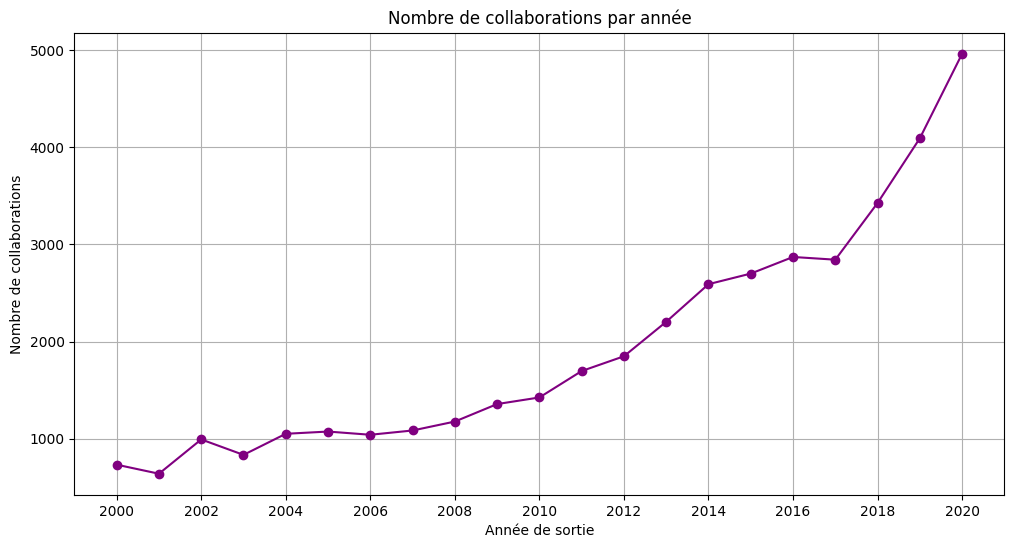

In [ ]:
# Visualisation de la tendance des collaborations par année
plt.figure(figsize=(12, 6))
collab_trend.plot(kind='line', marker='o', color='purple')
plt.title("Nombre de collaborations par année")
plt.xlabel("Année de sortie")
plt.ylabel("Nombre de collaborations")
plt.grid(True)
plt.xticks(range(2000, 2021, 2))
plt.show()

In [ ]:
# Sélectionner les colonnes d'intérêt
features = ['popularity', 'danceability', 'energy', 'instrumentalness', 'valence', 'acousticness', 'loudness']

# 1. Grouper par niveaux de popularité et calculer la moyenne des caractéristiques
grouped_data = tracks_df.groupby('popularity')[features[1:]].mean().reset_index()
print("\nAperçu des données moyennes par niveau de popularité :")
print(grouped_data.head())


Aperçu des données moyennes par niveau de popularité :
   popularity  danceability    energy  instrumentalness   valence  \
0           0      0.524661  0.356308          0.342346  0.520012   
1           1      0.514895  0.406060          0.252595  0.484416   
2           2      0.524085  0.440914          0.241067  0.518930   
3           3      0.518252  0.451192          0.224056  0.533912   
4           4      0.521053  0.447878          0.195352  0.537281   

   acousticness   loudness  
0      0.773138 -13.223010  
1      0.667383 -12.977742  
2      0.625539 -12.201210  
3      0.618235 -11.977005  
4      0.619231 -11.904902  


In [ ]:
# 2. Visualiser la relation entre popularité et danceabilité
fig_danceability = px.scatter(grouped_data, x="popularity", y="danceability", color="danceability", size='popularity',
                              title="Popularité vs Danceabilité")
fig_danceability.show()

In [ ]:
# Calculer le coefficient de corrélation de Pearson pour Popularité et Danceabilité
corr_danceability, _ = pearsonr(grouped_data['popularity'], grouped_data['danceability'])
print(f"\nCorrélation de Pearson entre Popularité et Danceabilité : {corr_danceability:.3f}")

# 3. Visualiser la relation entre Popularité et Instrumentalness
fig_instrumentalness = px.scatter(grouped_data, x="popularity", y="instrumentalness", color="instrumentalness", size='popularity',
                                  title="Popularité vs Instrumentalness")
fig_instrumentalness.show()




Corrélation de Pearson entre Popularité et Danceabilité : 0.899


In [ ]:
# Calculer le coefficient de corrélation de Pearson pour Popularité et Instrumentalness
corr_instrumentalness, _ = pearsonr(grouped_data['popularity'], grouped_data['instrumentalness'])
print(f"\nCorrélation de Pearson entre Popularité et Instrumentalness : {corr_instrumentalness:.3f}")


Corrélation de Pearson entre Popularité et Instrumentalness : -0.869


In [ ]:
# 4. Calcul de la matrice de corrélation et visualisation en heatmap
correlation_matrix = tracks_df[features].corr()
feature_list = features

fig_heatmap = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=feature_list,
    y=feature_list,
    colorscale='Viridis',
    colorbar=dict(title="Coefficient de corrélation")
))
fig_heatmap.update_layout(
    title="Heatmap des corrélations entre caractéristiques et popularité",
    width=800, height=700
)
fig_heatmap.show()

**Clustering**

In [ ]:
# Caractéristiques à utiliser pour le clustering
features = ['danceability', 'energy', 'instrumentalness', 'valence', 'acousticness', 'loudness', 'speechiness', 'tempo']
X = tracks_df[features]

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Déterminer le nombre optimal de clusters avec la méthode du coude

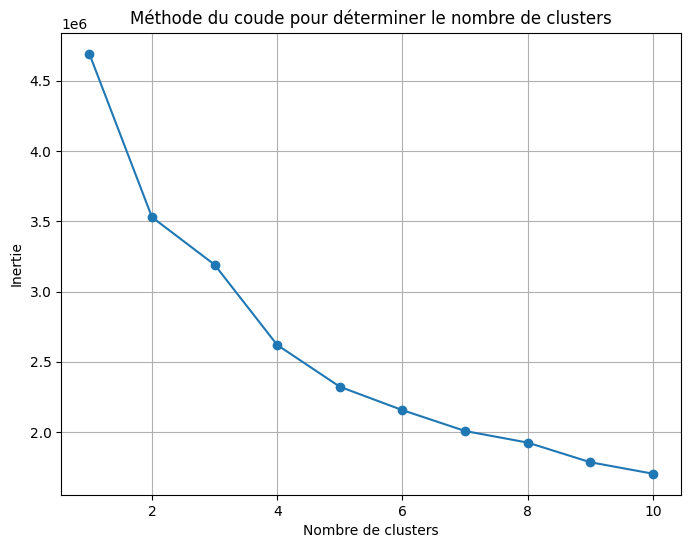

In [ ]:
# Calculer l'inertie pour différents nombres de clusters
inertia = []
k_range = range(1, 11)  # Tester de 1 à 10 clusters
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Tracer la méthode du coude
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title("Méthode du coude pour déterminer le nombre de clusters")
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")
plt.grid(True)
plt.show()

In [ ]:

# Calculer le score de silhouette pour différents nombres de clusters
silhouette_scores = []
for k in range(4, 7):  # Le score de silhouette n'est pas défini pour k=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Tracer le score de silhouette
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='purple')
plt.title("Score de silhouette pour différents nombres de clusters")
plt.xlabel("Nombre de clusters")
plt.ylabel("Score de silhouette")
plt.grid(True)
plt.show()


KeyboardInterrupt: 

In [ ]:
# Appliquer K-Means avec 4 clusters
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
tracks_df['cluster'] = kmeans.fit_predict(X_scaled)


In [ ]:
# Afficher les caractéristiques moyennes de chaque cluster
cluster_summary = tracks_df.groupby('cluster')[features].mean()
print("\nCaractéristiques moyennes de chaque cluster :")
print(cluster_summary)


Caractéristiques moyennes de chaque cluster :
         danceability    energy  instrumentalness   valence  acousticness  \
cluster                                                                     
0            0.425111  0.282795          0.801749  0.387100      0.799504   
1            0.496844  0.338764          0.022401  0.431824      0.711713   
2            0.667222  0.399447          0.005406  0.564655      0.633990   
3            0.619266  0.721527          0.056054  0.652552      0.215848   

          loudness  speechiness       tempo  
cluster                                      
0       -16.858590     0.057878  108.778786  
1       -12.312039     0.054823  112.730303  
2       -15.361944     0.853749  102.307400  
3        -7.339264     0.080148  124.966551  


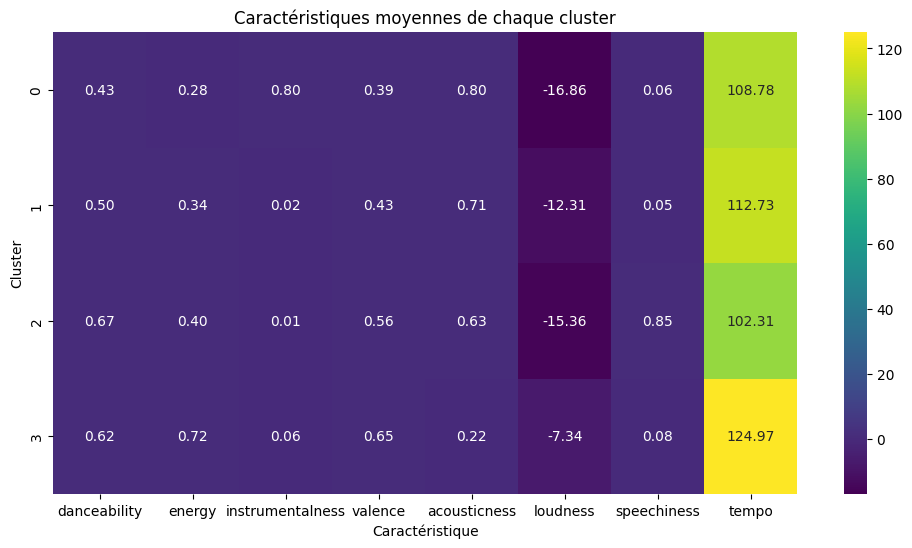

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_summary, annot=True, cmap="viridis", fmt=".2f")
plt.title("Caractéristiques moyennes de chaque cluster")
plt.xlabel("Caractéristique")
plt.ylabel("Cluster")
plt.show()


### Interprétation des clusters

1. **Cluster 0**
   - **Danceability** : Faible (0.42)
   - **Energy** : Très faible (0.28)
   - **Instrumentalness** : Élevée (0.80)
   - **Acousticness** : Très élevée (0.80)
   - **Loudness** : Faible (-16.86 dB)
   - **Speechiness** : Faible (0.057)
   - **Type de morceaux** : Ce cluster semble regrouper des morceaux calmes, majoritairement instrumentaux et acoustiques. Il pourrait inclure des morceaux de musique classique, ambient ou des morceaux instrumentaux.

2. **Cluster 1**
   - **Danceability** : Moyenne (0.49)
   - **Energy** : Faible (0.34)
   - **Instrumentalness** : Très faible (0.02)
   - **Acousticness** : Moyenne à élevée (0.71)
   - **Loudness** : Moyenne (-12.31 dB)
   - **Speechiness** : Faible (0.054)
   - **Type de morceaux** : Ce cluster pourrait correspondre à des morceaux plus mélodieux, mais non instrumentaux, avec un accent acoustique. On pourrait y trouver des morceaux de genres comme la pop acoustique ou le soft rock.

3. **Cluster 2**
   - **Danceability** : Élevée (0.67)
   - **Energy** : Moyenne (0.40)
   - **Instrumentalness** : Très faible (0.005)
   - **Acousticness** : Moyenne (0.63)
   - **Loudness** : Moyenne (-15.36 dB)
   - **Speechiness** : Très élevée (0.85)
   - **Type de morceaux** : Ce cluster semble regrouper des morceaux plus dansants, avec un haut niveau de paroles (probablement des genres comme le rap ou le spoken word). Il pourrait inclure des morceaux de hip-hop ou de rap avec une composante vocale prédominante.

4. **Cluster 3**
   - **Danceability** : Élevée (0.62)
   - **Energy** : Très élevée (0.72)
   - **Instrumentalness** : Faible (0.056)
   - **Acousticness** : Faible (0.22)
   - **Loudness** : Forte (-7.34 dB)
   - **Speechiness** : Moyenne (0.08)
   - **Type de morceaux** : Ce cluster pourrait correspondre aux morceaux énergiques et dansants, avec un son puissant et peu acoustique. Il inclut probablement des morceaux de genres comme l’électro, la pop énergique, ou la dance.

---

### Résumé des types de morceaux par cluster

| Cluster | Type de morceaux                                |
|---------|-------------------------------------------------|
| 0       | Calme, instrumental, acoustique                 |
| 1       | Mélodieux, acoustique, non instrumental         |
| 2       | Dansant, avec paroles prédominantes (rap/hip-hop) |
| 3       | Énergique, dansant, peu acoustique (électro/pop) |




Popularité moyenne de chaque cluster :
cluster
3    33.031984
1    23.013009
2    20.612459
0    15.382010
Name: popularity, dtype: float64


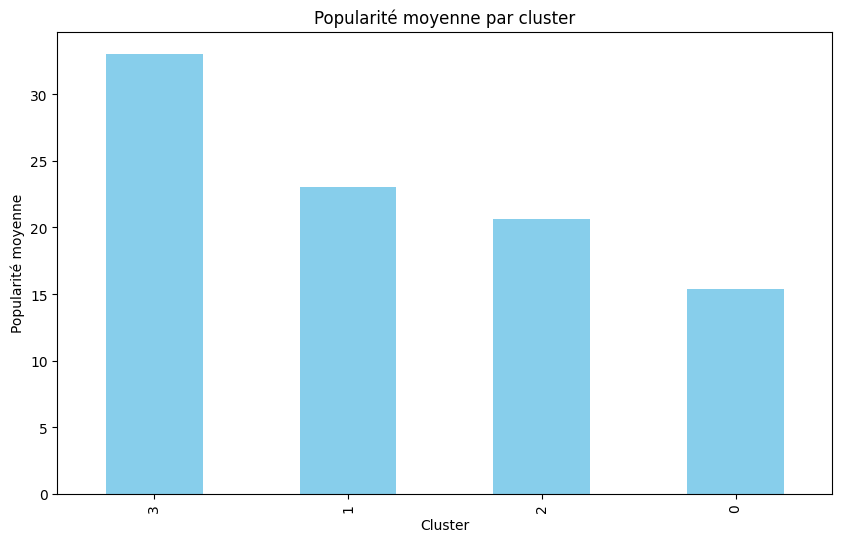

In [ ]:
# Calculer la popularité moyenne dans chaque cluster
popularity_per_cluster = tracks_df.groupby('cluster')['popularity'].mean().sort_values(ascending=False)
print("\nPopularité moyenne de chaque cluster :")
print(popularity_per_cluster)

# Visualisation de la popularité moyenne par cluster
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
popularity_per_cluster.plot(kind='bar', color='skyblue')
plt.title("Popularité moyenne par cluster")
plt.xlabel("Cluster")
plt.ylabel("Popularité moyenne")
plt.show()


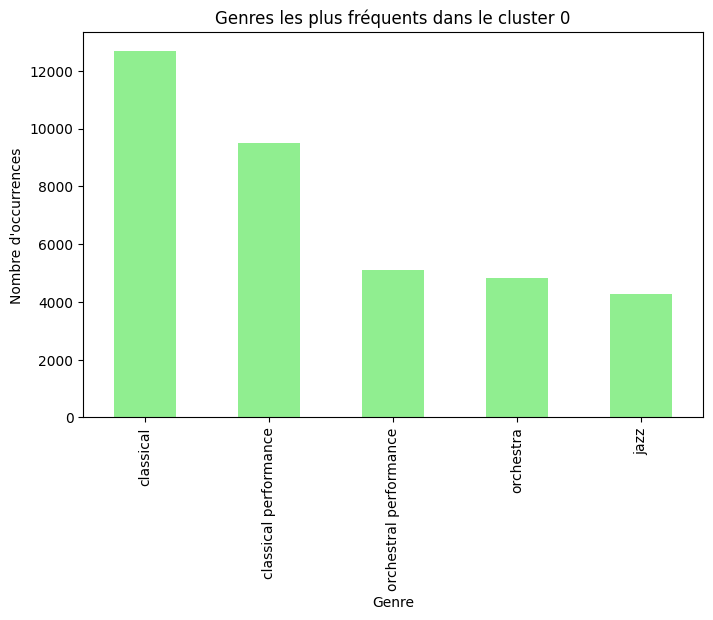

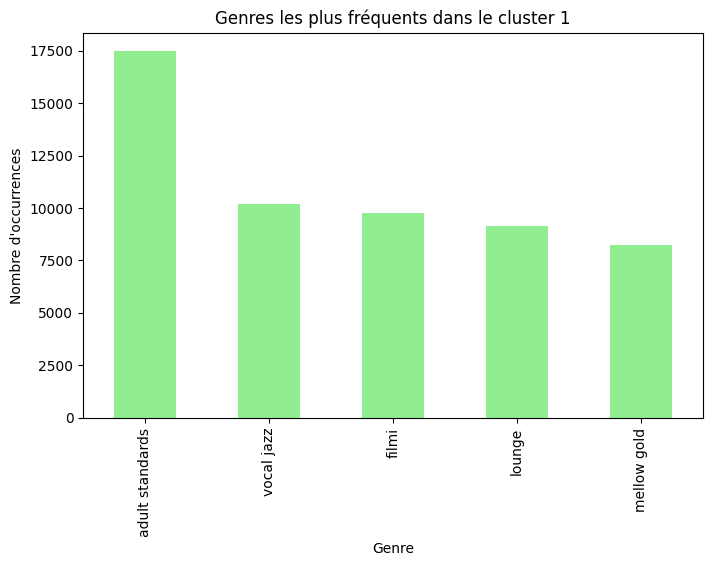

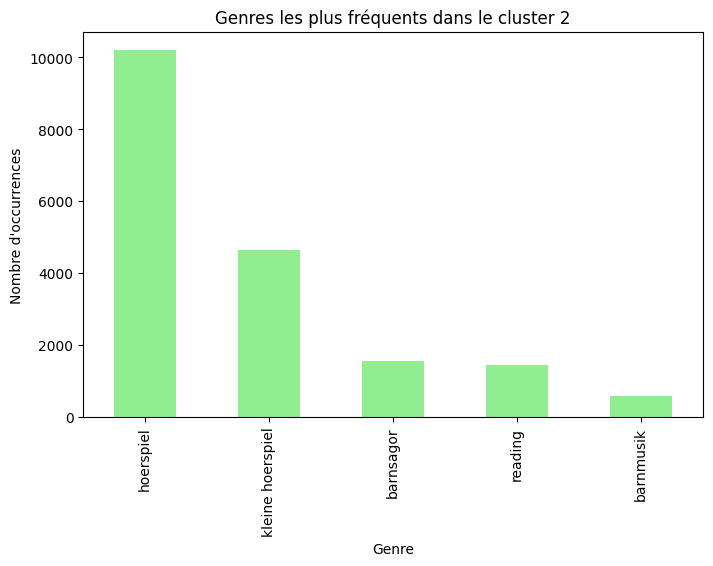

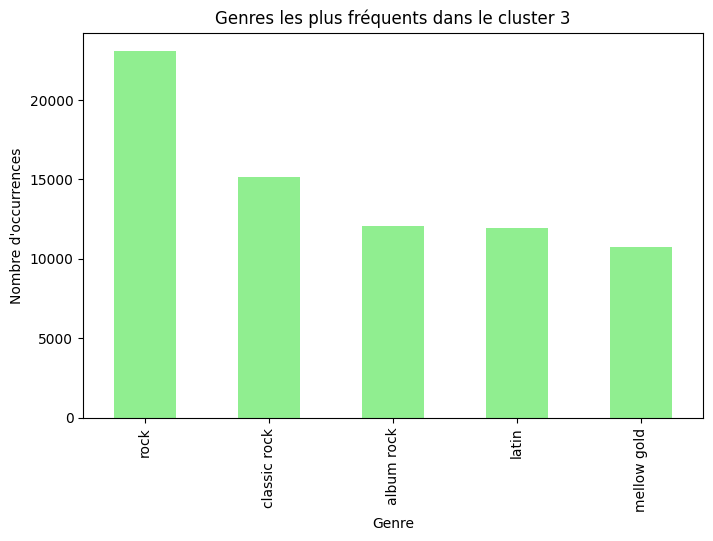

In [ ]:

# Vérifier que la colonne 'id_artists' est dans tracks_df et que 'genres' est dans artists_df
if 'id_artists' in tracks_df.columns and 'genres' in artists_df.columns:
    # Associer les genres aux morceaux en utilisant les identifiants des artistes
    artists_genres = artists_df.set_index('id')['genres'].to_dict()  # Créer un dictionnaire d'artistes et leurs genres

    # Extraire les genres pour chaque morceau en combinant les genres des artistes associés
    def get_genres_from_artists(id_artists):
        genres = []
        for artist_id in ast.literal_eval(id_artists):  # Convertir les chaînes de listes en listes réelles
            if artist_id in artists_genres:
                genres.extend(artists_genres[artist_id])
        return list(set(genres))  # Utiliser set pour éviter les doublons

    # Appliquer la fonction aux morceaux
    tracks_df['genres'] = tracks_df['id_artists'].apply(get_genres_from_artists)

    # Continuer l'analyse de répartition des genres par cluster
    genre_cluster = []
    for _, row in tracks_df.iterrows():
        for genre in row['genres']:
            genre_cluster.append([genre, row['cluster']])

    # Convertir en DataFrame et compter les genres par cluster
    genre_cluster_df = pd.DataFrame(genre_cluster, columns=['genre', 'cluster'])
    genre_counts = genre_cluster_df.groupby('cluster')['genre'].value_counts().unstack(fill_value=0)

    # Visualisation des genres les plus fréquents par cluster
    for cluster in genre_counts.index:
        # Extraire les 5 genres les plus fréquents dans chaque cluster
        top_genres = genre_counts.loc[cluster].nlargest(5)

        plt.figure(figsize=(8, 5))
        top_genres.plot(kind='bar', color='lightgreen')
        plt.title(f"Genres les plus fréquents dans le cluster {cluster}")
        plt.xlabel("Genre")
        plt.ylabel("Nombre d'occurrences")
        plt.show()
else:
    print("Les informations de genres sont manquantes dans les données disponibles.")


Les résultats de la répartition des genres dans chaque cluster sont cohérents avec l'analyse que nous avions faite des caractéristiques de chaque cluster. Voici comment cela s'aligne avec notre analyse précédente :

1. **Cluster 0** :
   - **Genres dominants** : Classical, Classical Performance, Orchestral Performance, Orchestra, Jazz.
   - **Caractéristiques moyennes** : Faible danceabilité et énergie, haute acousticness et instrumentalness.
   - **Interprétation** : Ce cluster regroupe des morceaux instrumentaux et acoustiques, qui sont souvent associés à des genres classiques et orchestraux, comme prévu.

2. **Cluster 1** :
   - **Genres dominants** : Adult Standards, Vocal Jazz, Filmi, Lounge, Mellow Gold.
   - **Caractéristiques moyennes** : Moyenne danceabilité et acousticness, faible énergie, très faible instrumentalness.
   - **Interprétation** : Ce cluster représente des morceaux plus mélodieux, souvent vocaux et doux, ce qui correspond bien aux genres comme le jazz vocal et le lounge.

3. **Cluster 2** :
   - **Genres dominants** : Hoerspiel, Kleine Hoerspiel, Barnsagor, Reading, Barnmusik.
   - **Caractéristiques moyennes** : Élevée speechiness, moyenne danceabilité, faible instrumentalness.
   - **Interprétation** : Ce cluster semble regrouper des morceaux avec beaucoup de paroles, souvent associés aux genres narratifs et éducatifs, comme les histoires audio ("Hoerspiel") et les morceaux pour enfants, ce qui est cohérent avec notre analyse des caractéristiques.

4. **Cluster 3** :
   - **Genres dominants** : Rock, Classic Rock, Album Rock, Latin, Mellow Gold.
   - **Caractéristiques moyennes** : Haute danceabilité et énergie, faible acousticness, forte loudness.
   - **Interprétation** : Ce cluster regroupe des morceaux énergiques et dansants, ce qui est cohérent avec les genres rock et classic rock, qui sont souvent associés à ces caractéristiques.

### Conclusion
La répartition des genres dans chaque cluster confirme et renforce notre interprétation initiale des caractéristiques de chaque cluster. Cela montre que les clusters sont bien définis et segmentés en fonction de leurs attributs musicaux principaux, correspondant à des styles ou types de musique spécifiques.


Caractéristiques moyennes des morceaux populaires dans chaque cluster :
         danceability    energy  instrumentalness   valence  acousticness  \
cluster                                                                     
0.0          0.405514  0.298226          0.804072  0.285209      0.675159   
2.0          0.667325  0.487922          0.001917  0.577821      0.520191   
1.0          0.513408  0.370289          0.013861  0.365438      0.637166   
3.0          0.647531  0.721037          0.028935  0.596986      0.184471   

          loudness  speechiness       tempo  
cluster                                      
0.0     -17.723640     0.050013  108.624965  
2.0     -12.657888     0.821843   99.593416  
1.0     -11.082563     0.050571  113.743507  
3.0      -6.330551     0.095296  123.894360  


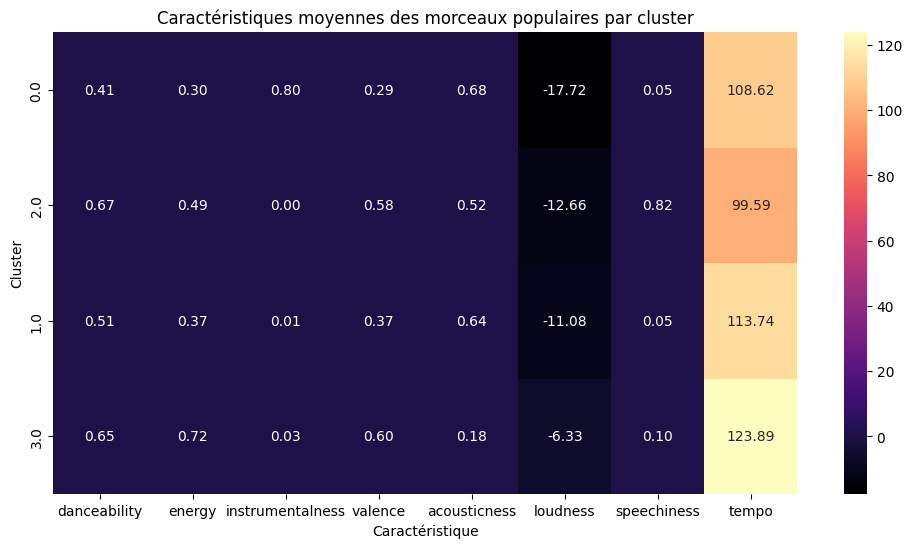

In [ ]:
# Calculer le 80e percentile de popularité pour chaque cluster
top_20_percent = tracks_df.groupby('cluster')['popularity'].quantile(0.8)

# Filtrer les morceaux populaires (top 20%) et calculer les caractéristiques moyennes pour chaque cluster
top_tracks_per_cluster = []
for cluster in tracks_df['cluster'].unique():
    # Sélectionner les morceaux dans le top 20% de popularité pour ce cluster
    top_tracks = tracks_df[(tracks_df['cluster'] == cluster) & (tracks_df['popularity'] >= top_20_percent[cluster])]
    # Calculer les moyennes des caractéristiques pour ces morceaux populaires
    top_tracks_summary = top_tracks[features].mean()
    top_tracks_summary['cluster'] = cluster
    top_tracks_per_cluster.append(top_tracks_summary)

# Convertir la liste de résultats en DataFrame
top_tracks_per_cluster = pd.DataFrame(top_tracks_per_cluster).set_index('cluster')

# Afficher les caractéristiques moyennes des morceaux populaires dans chaque cluster
print("\nCaractéristiques moyennes des morceaux populaires dans chaque cluster :")
print(top_tracks_per_cluster)

# Visualiser les caractéristiques moyennes des morceaux populaires par cluster
plt.figure(figsize=(12, 6))
sns.heatmap(top_tracks_per_cluster, annot=True, cmap="magma", fmt=".2f")
plt.title("Caractéristiques moyennes des morceaux populaires par cluster")
plt.xlabel("Caractéristique")
plt.ylabel("Cluster")
plt.show()




### Interprétation des caractéristiques moyennes des morceaux populaires par cluster

1. **Cluster 0 (Calme, instrumental, acoustique)**
   - **Danceability** : Moyenne (0.41)
   - **Energy** : Faible (0.30)
   - **Instrumentalness** : Très élevée (0.80)
   - **Valence** : Moyenne (0.29)
   - **Acousticness** : Élevée (0.68)
   - **Loudness** : Très faible (-17.72 dB)
   - **Speechiness** : Très faible (0.05)
   - **Tempo** : Moyenne (108.62)
   - **Conclusion** : Les morceaux populaires dans ce cluster tendent à être calmes, acoustiques et instrumentaux, avec une énergie et une loudness faibles. Ces morceaux pourraient plaire aux auditeurs à la recherche de morceaux apaisants ou de musique d'ambiance.

2. **Cluster 1 (Mélodieux, souvent vocal, avec un accent acoustique)**
   - **Danceability** : Moyenne (0.51)
   - **Energy** : Moyenne-faible (0.37)
   - **Instrumentalness** : Très faible (0.01)
   - **Valence** : Moyenne (0.37)
   - **Acousticness** : Élevée (0.64)
   - **Loudness** : Moyenne (-11.08 dB)
   - **Speechiness** : Très faible (0.05)
   - **Tempo** : Moyenne-élevée (113.74)
   - **Conclusion** : Les morceaux populaires dans ce cluster sont généralement mélodieux, avec un accent acoustique, mais avec une énergie et une loudness légèrement plus élevées que ceux du cluster 0. Cela peut correspondre à des morceaux vocaux doux ou jazzy.

3. **Cluster 2 (Narratif/parlé, probablement des histoires audio ou du spoken word)**
   - **Danceability** : Élevée (0.67)
   - **Energy** : Moyenne (0.49)
   - **Instrumentalness** : Très faible (0.002)
   - **Valence** : Moyenne-élevée (0.58)
   - **Acousticness** : Moyenne (0.52)
   - **Loudness** : Moyenne (-12.66 dB)
   - **Speechiness** : Très élevée (0.82)
   - **Tempo** : Moyenne-basse (99.59)
   - **Conclusion** : Les morceaux populaires dans ce cluster ont une `speechiness` très élevée, indiquant une composante parlée dominante, ce qui est cohérent avec les genres narratifs comme les histoires audio. La popularité de ce type de morceaux pourrait être liée à l'intérêt pour les podcasts ou les livres audio.

4. **Cluster 3 (Énergique et dansant, souvent associé au rock ou à la pop)**
   - **Danceability** : Élevée (0.65)
   - **Energy** : Très élevée (0.72)
   - **Instrumentalness** : Faible (0.03)
   - **Valence** : Moyenne-élevée (0.60)
   - **Acousticness** : Très faible (0.18)
   - **Loudness** : Élevée (-6.33 dB)
   - **Speechiness** : Moyenne (0.10)
   - **Tempo** : Élevée (123.89)
   - **Conclusion** : Les morceaux populaires dans ce cluster sont très énergiques, dansants, et avec une loudness élevée, ce qui est cohérent avec les genres comme le rock ou la pop. Ce type de morceaux semble plaire aux auditeurs qui recherchent de la musique entraînante et dynamique.

---

### Résumé

| Cluster | Type de morceaux populaires                                         | Caractéristiques principales                |
|---------|---------------------------------------------------------------------|--------------------------------------------|
| 0       | Calme, instrumental, acoustique                                     | Faible énergie, loudness et speechiness    |
| 1       | Mélodieux, acoustique, souvent vocal                                | Moyenne énergie, loudness, accent acoustique |
| 2       | Narratif/parlé (histoires audio, spoken word)                       | Très élevée speechiness, faible tempo      |
| 3       | Énergique, dansant (rock, pop)                                      | Très élevée énergie et loudness            |



# **la visualisation finale des clusters en 2D**

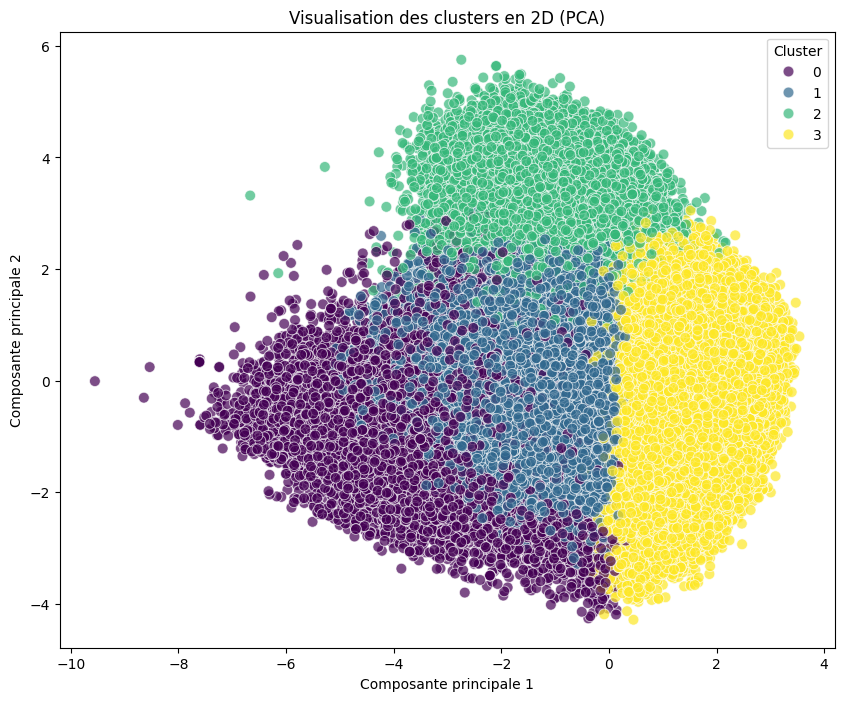

In [ ]:
# Appliquer PCA pour réduire les données à 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)  # X_scaled est la version normalisée des caractéristiques

# Ajouter les composantes PCA au DataFrame
tracks_df['pca1'] = X_pca[:, 0]
tracks_df['pca2'] = X_pca[:, 1]

# Visualiser les clusters en 2D
plt.figure(figsize=(10, 8))
sns.scatterplot(data=tracks_df, x='pca1', y='pca2', hue='cluster', palette="viridis", s=60, alpha=0.7)
plt.title("Visualisation des clusters en 2D (PCA)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.legend(title="Cluster")
plt.show()


### Interprétation des clusters dans l'espace 2D

#### Cluster 0 (Calme, instrumental et acoustique)
- **Position** : Situé sur la partie gauche du graphique, le cluster 0 est relativement dense et bien séparé des autres clusters, notamment du cluster 3 (énergique).
- **Caractéristiques principales** : Ce cluster regroupe des morceaux calmes avec une `acousticness` et `instrumentalness` élevées, ainsi qu'une faible `energy` et `loudness`.
- **Chevauchement avec les autres clusters** : Ce cluster chevauche légèrement les clusters 1 et 2, ce qui est logique, car certains morceaux calmes et instrumentaux pourraient contenir des éléments vocaux doux ou narratifs, correspondant aux caractéristiques des clusters voisins.
- **Insight** : Le positionnement de ce cluster montre que ces morceaux sont distinctement plus acoustiques et calmes, mais avec une petite frontière partagée avec des morceaux mélodieux (cluster 1) ou narratifs (cluster 2), qui peuvent parfois partager des attributs doux et apaisants.

#### Cluster 1 (Mélodieux, acoustique, souvent vocal)
- **Position** : Situé à proximité des clusters 0 et 2, le cluster 1 forme un groupe dispersé au centre, avec un chevauchement significatif avec les autres clusters.
- **Caractéristiques principales** : Ce cluster représente des morceaux plus mélodieux, souvent avec des voix, une `acousticness` élevée et une `energy` modérée.
- **Chevauchement avec les autres clusters** : Le chevauchement du cluster 1 avec les clusters 0 et 2 est attendu, car il contient des morceaux qui combinent à la fois des éléments acoustiques (proches de ceux du cluster 0) et parfois une composante narrative légère (comme le cluster 2).
- **Insight** : La position centrale et le chevauchement important du cluster 1 suggèrent qu'il s'agit d'un groupe de morceaux de transition, représentant des styles qui partagent des caractéristiques communes avec des morceaux calmes, narratifs et mélodieux. Ce cluster est plus varié, ce qui explique sa dispersion dans l'espace.

#### Cluster 2 (Narratif, parlé, histoires audio ou spoken word)
- **Position** : Situé en haut au centre, le cluster 2 est relativement bien défini, mais il montre un chevauchement avec les clusters 1 et 0.
- **Caractéristiques principales** : Ce cluster est caractérisé par une `speechiness` très élevée, une `danceability` moyenne et une `energy` modérée. Il contient des morceaux à forte composante narrative, comme des histoires audio ou des morceaux de spoken word.
- **Chevauchement avec les autres clusters** : Le chevauchement avec le cluster 1 est particulièrement prononcé, ce qui s'explique par le fait que certains morceaux narratifs peuvent être accompagnés d'éléments musicaux doux ou mélodieux. Le chevauchement avec le cluster 0 est probablement dû à certains morceaux narratifs qui adoptent des ambiances acoustiques et instrumentales.
- **Insight** : Le cluster 2 est distinct des clusters plus énergiques, mais partage des frontières avec les morceaux mélodieux et calmes, illustrant une proximité musicale pour les morceaux narratifs et doux.

#### Cluster 3 (Énergique, dansant, rock/pop)
- **Position** : Ce cluster est situé sur la partie droite du graphique, bien distinct des clusters 0 et 2, et chevauche légèrement le cluster 1.
- **Caractéristiques principales** : Le cluster 3 représente des morceaux très énergiques et dansants, avec une `loudness` élevée et une `energy` élevée. Il inclut des genres comme le rock et la pop, qui sont dynamiques et entraînants.
- **Chevauchement avec les autres clusters** : Le chevauchement avec le cluster 1 est limité mais présent. Ce chevauchement peut être dû à des morceaux pop ou rock plus doux ou des morceaux de transition entre pop mélodieuse et rock énergique.
- **Insight** : La séparation nette de ce cluster des autres montre que les morceaux énergiques et dansants sont distincts en termes de caractéristiques. Ils attirent probablement des auditeurs avec une préférence pour la musique dynamique, tandis que les morceaux des autres clusters sont plus orientés vers des ambiances calmes, narratives ou mélodieuses.

---

### Synthèse de l'interprétation

| Cluster | Position dans l'espace 2D      | Chevauchement           | Caractéristiques dominantes                          |
|---------|--------------------------------|--------------------------|-----------------------------------------------------|
| 0       | Gauche                         | Cluster 1 et Cluster 2   | Calme, instrumental, acoustique                     |
| 1       | Centre, assez dispersé         | Clusters 0, 2 et 3      | Mélodieux, vocal, acoustique, de transition         |
| 2       | Haut-centre                    | Cluster 1 et Cluster 0   | Narratif, parlé, avec une composante narrative forte|
| 3       | Droite, bien séparé            | Cluster 1 (léger chevauchement) | Énergique, dansant, rock/pop                        |

### Conclusion générale

- **Structure des clusters** : La disposition des clusters dans l'espace 2D reflète les caractéristiques principales de chaque groupe. Les morceaux énergétiques sont bien distincts des morceaux calmes et acoustiques, tandis que les morceaux narratifs et mélodieux se situent entre les deux extrêmes.
- **Transitions musicales** : Le chevauchement entre les clusters, surtout au niveau des clusters 1 et 2, indique des transitions et similitudes dans les caractéristiques musicales. Certains morceaux partagent des éléments qui les rendent plus polyvalents ou adaptés à différents styles.
- **Utilisation pour la recommandation** : Cette structure des clusters peut être utilisée pour recommander des morceaux en fonction des préférences de l'auditeur, en proposant des morceaux proches dans l'espace des clusters ou des morceaux aux frontières pour des styles de transition.



## analyse basée sur les graphes




In [ ]:
# Sélectionner les 1000 artistes les plus populaires
top_artists = artists_df.nlargest(1000, 'popularity')['id'].tolist()

# Filtrer les morceaux pour ne garder que ceux avec au moins un artiste dans le top 1000
filtered_tracks = tracks_df[tracks_df['id_artists'].apply(lambda x: any(artist in top_artists for artist in ast.literal_eval(x)))]

# Vérifier le nombre de morceaux après le filtrage
print(f"Nombre de morceaux avec des artistes du top 1000 : {filtered_tracks.shape[0]}")


Nombre de morceaux avec des artistes du top 1000 : 70907


In [ ]:
# Filtrer pour ne garder que les morceaux sortis en 2017 ou après
filtered_tracks = filtered_tracks[filtered_tracks['release_date'] >= datetime(2017, 1, 1)]

# Vérifier le nombre de morceaux restants
print(f"Nombre de morceaux après 2017 avec des artistes du top 1000 : {filtered_tracks.shape[0]}")

Nombre de morceaux après 2017 avec des artistes du top 1000 : 12140


In [ ]:
# Initialiser une liste pour stocker les collaborations
collaborations = []

# Parcourir chaque morceau avec plusieurs artistes
for _, row in filtered_tracks.iterrows():
    artists = ast.literal_eval(row['id_artists'])  # Convertir la chaîne de caractères en liste
    # Ne garder que les artistes du top 1000 pour ce morceau
    artists = [artist for artist in artists if artist in top_artists]

    # Si le morceau a plus d'un artiste dans le top 1000
    if len(artists) > 1:
        # Créer une ligne pour chaque paire d'artistes
        for artist1, artist2 in combinations(artists, 2):
            collaboration = {
                'artist_1': artist1,
                'artist_2': artist2,
                'track_id': row['id'],
                'track_name': row['name'],
                'track_popularity': row['popularity'],
                'release_date': row['release_date'],
                'danceability': row['danceability'],
                'energy': row['energy'],
                'loudness': row['loudness'],
                'speechiness': row['speechiness'],
                'acousticness': row['acousticness'],
                'instrumentalness': row['instrumentalness'],
                'liveness': row['liveness'],
                'valence': row['valence'],
                'tempo': row['tempo'],
                'cluster': row['cluster']  # Cluster assigné au morceau
            }
            collaborations.append(collaboration)

# Convertir la liste des collaborations en DataFrame
collaborations_df = pd.DataFrame(collaborations)

# Afficher les premières lignes du DataFrame des collaborations
print(collaborations_df.head())

                 artist_1                artist_2                track_id  \
0  7hJcb9fa4alzcOq3EaNPoG  02kJSzxNuaWGqwubyUba0Z  64vocudN4Bh1YUcQ0pVsly   
1  2c5WYCqQGs0UttiLCzVfOe  4W12lEvVl5wectUtRNrvDh  2bRKxuH1o7pTmb1y4GfdEc   
2  0TnOYISbd1XYRBk9myaseg  21E3waRsmPlU7jZsS13rcj  6w37LoqgjmsHSAVbFNGWC6   
3  0TnOYISbd1XYRBk9myaseg  4D75GcNG95ebPtNvoNVXhz  6w37LoqgjmsHSAVbFNGWC6   
4  21E3waRsmPlU7jZsS13rcj  4D75GcNG95ebPtNvoNVXhz  6w37LoqgjmsHSAVbFNGWC6   

                                          track_name  track_popularity  \
0  Still Feelin' It (feat. Snoop Dogg, G-Eazy, Ke...                23   
1          Clean White Noise - Loopable with no fade                86   
2                                 Give Me Everything                40   
3                                 Give Me Everything                40   
4                                 Give Me Everything                40   

  release_date  danceability   energy  loudness  speechiness  acousticness  \
0   2018-08-24

In [ ]:
print(f"Nombre de collaborations : {collaborations_df.shape[0]}")


Nombre de collaborations : 5872


In [ ]:
# Afficher les premières lignes des collaborations
print(collaborations_df.head())

# Vérifier les statistiques de base
print(collaborations_df.describe())


                 artist_1                artist_2                track_id  \
0  7hJcb9fa4alzcOq3EaNPoG  02kJSzxNuaWGqwubyUba0Z  64vocudN4Bh1YUcQ0pVsly   
1  2c5WYCqQGs0UttiLCzVfOe  4W12lEvVl5wectUtRNrvDh  2bRKxuH1o7pTmb1y4GfdEc   
2  0TnOYISbd1XYRBk9myaseg  21E3waRsmPlU7jZsS13rcj  6w37LoqgjmsHSAVbFNGWC6   
3  0TnOYISbd1XYRBk9myaseg  4D75GcNG95ebPtNvoNVXhz  6w37LoqgjmsHSAVbFNGWC6   
4  21E3waRsmPlU7jZsS13rcj  4D75GcNG95ebPtNvoNVXhz  6w37LoqgjmsHSAVbFNGWC6   

                                          track_name  track_popularity  \
0  Still Feelin' It (feat. Snoop Dogg, G-Eazy, Ke...                23   
1          Clean White Noise - Loopable with no fade                86   
2                                 Give Me Everything                40   
3                                 Give Me Everything                40   
4                                 Give Me Everything                40   

  release_date  danceability   energy  loudness  speechiness  acousticness  \
0   2018-08-24

In [ ]:
# Créer un dictionnaire des IDs d'artistes et de leurs noms
artist_id_to_name = artists_df.set_index('id')['name'].to_dict()

# Ajouter les noms des artistes dans le dataset des collaborations
collaborations_df['artist_1_name'] = collaborations_df['artist_1'].map(artist_id_to_name)
collaborations_df['artist_2_name'] = collaborations_df['artist_2'].map(artist_id_to_name)

# Vérifier les premières lignes
print(collaborations_df.head())


                 artist_1                artist_2                track_id  \
0  7hJcb9fa4alzcOq3EaNPoG  02kJSzxNuaWGqwubyUba0Z  64vocudN4Bh1YUcQ0pVsly   
1  2c5WYCqQGs0UttiLCzVfOe  4W12lEvVl5wectUtRNrvDh  2bRKxuH1o7pTmb1y4GfdEc   
2  0TnOYISbd1XYRBk9myaseg  21E3waRsmPlU7jZsS13rcj  6w37LoqgjmsHSAVbFNGWC6   
3  0TnOYISbd1XYRBk9myaseg  4D75GcNG95ebPtNvoNVXhz  6w37LoqgjmsHSAVbFNGWC6   
4  21E3waRsmPlU7jZsS13rcj  4D75GcNG95ebPtNvoNVXhz  6w37LoqgjmsHSAVbFNGWC6   

                                          track_name  track_popularity  \
0  Still Feelin' It (feat. Snoop Dogg, G-Eazy, Ke...                23   
1          Clean White Noise - Loopable with no fade                86   
2                                 Give Me Everything                40   
3                                 Give Me Everything                40   
4                                 Give Me Everything                40   

  release_date  danceability   energy  loudness  speechiness  acousticness  \
0   2018-08-24

In [ ]:

# Créer un graphe non orienté
G = nx.Graph()

# Ajouter les nœuds et les arêtes au graphe
for _, row in collaborations_df.iterrows():
    G.add_edge(row['artist_1_name'], row['artist_2_name'],
               track_id=row['track_id'],
               track_name=row['track_name'],
               track_popularity=row['track_popularity'],
               release_date=row['release_date'])

# Afficher des informations sur le graphe
print(f"Nombre d'artistes (nœuds) : {G.number_of_nodes()}")
print(f"Nombre de collaborations (arêtes) : {G.number_of_edges()}")


Nombre d'artistes (nœuds) : 698
Nombre de collaborations (arêtes) : 2731


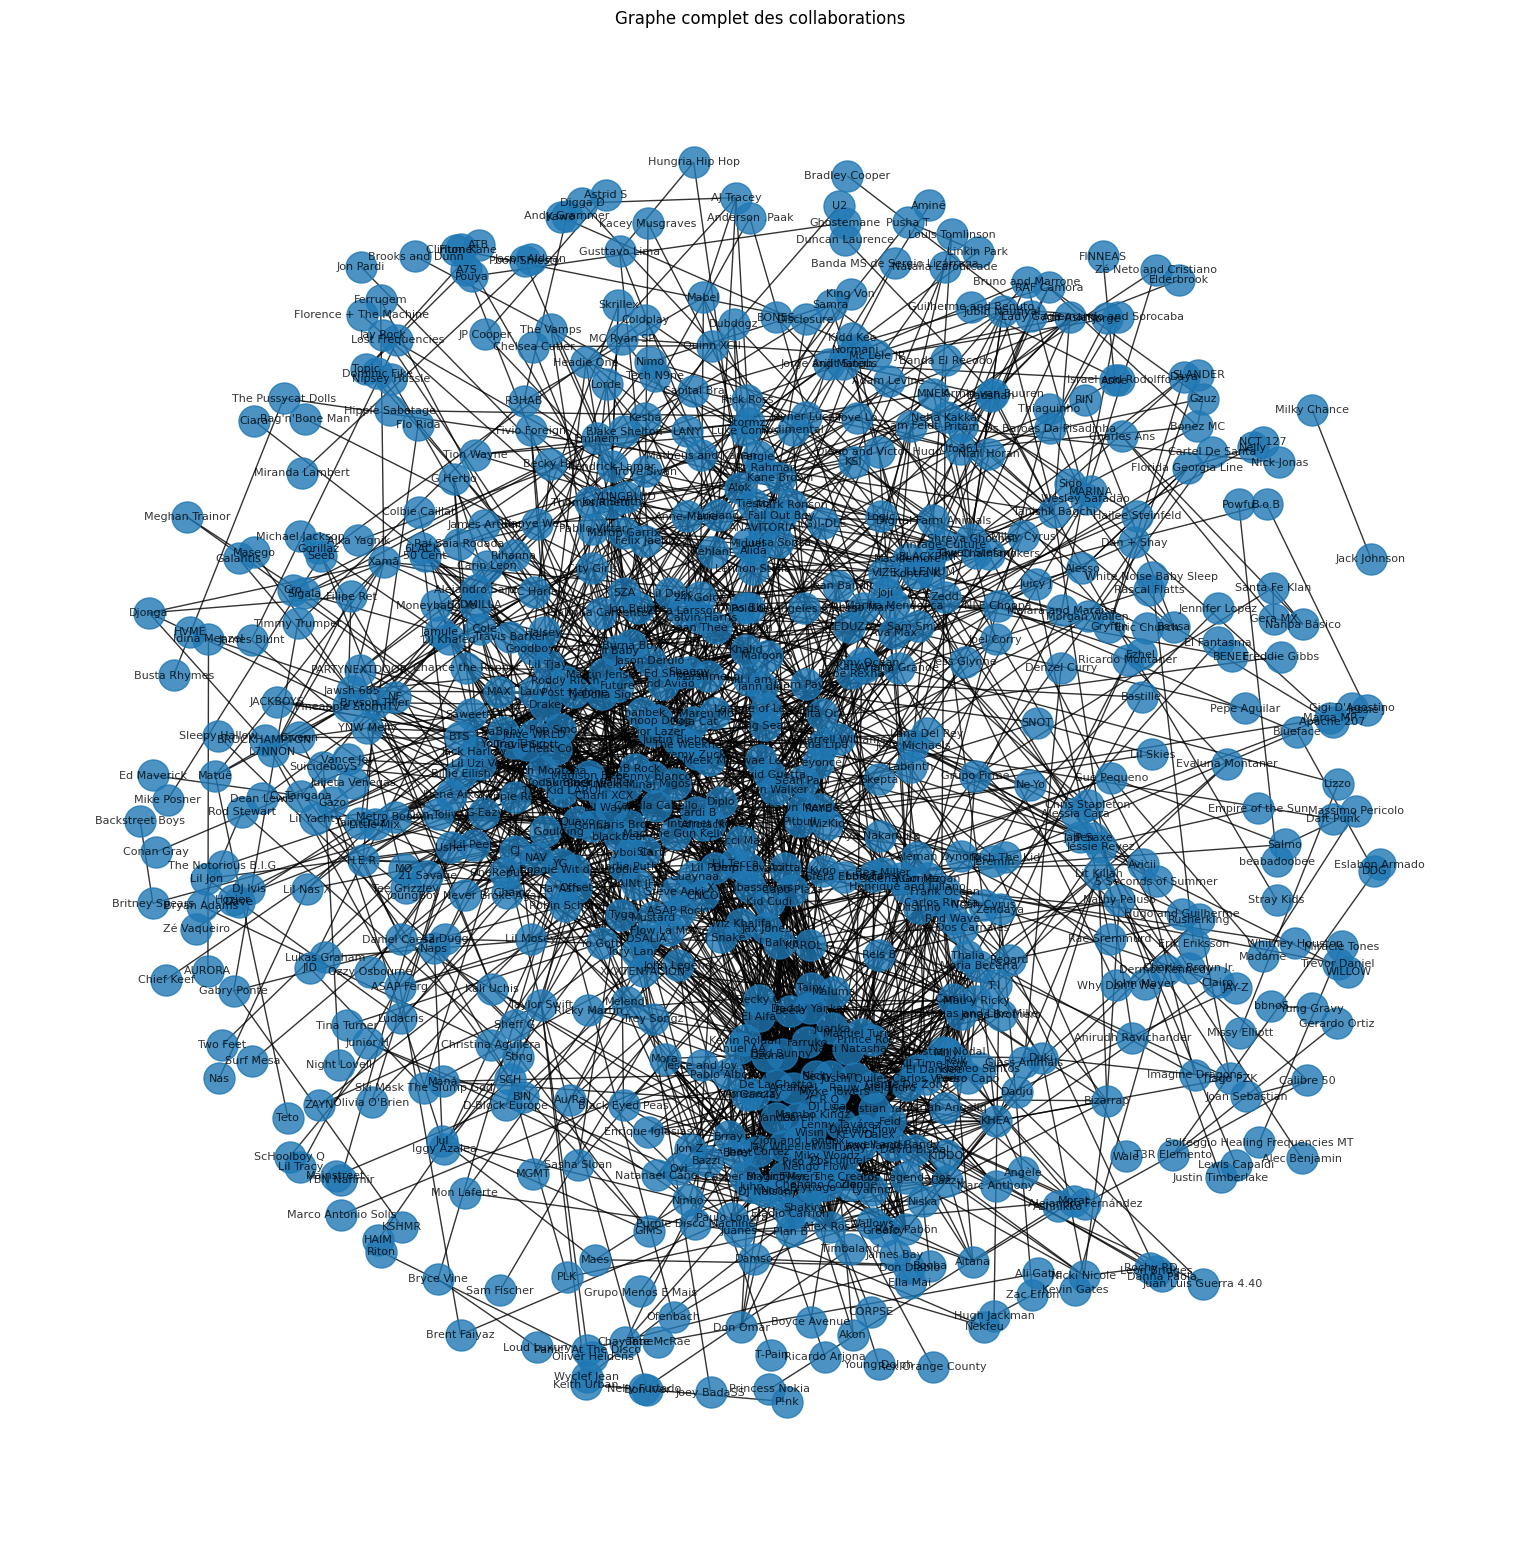

In [ ]:
# Fonction pour nettoyer les noms des artistes
def clean_name(name):
    return name.replace('$', 'S').replace('#', '').replace('&', 'and')

# Appliquer le nettoyage aux nœuds
cleaned_labels = {node: clean_name(node) for node in G.nodes()}

# Visualisation avec les noms nettoyés
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, k=0.3)  # Disposition "spring" pour espacer les nœuds
nx.draw(G, pos, labels=cleaned_labels, with_labels=True, node_size=500, font_size=8, font_color='black', alpha=0.8)
plt.title("Graphe complet des collaborations")
plt.show()


In [ ]:
# Fonction pour nettoyer les noms des artistes
def clean_name(name):
    return name.replace('$', 'S').replace('#', '').replace('&', 'and')

# Calcul des métriques de centralité
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G, normalized=True)

# Détection des communautés avec l'algorithme Louvain
communities = community_louvain.best_partition(G)

# Ajouter les métriques comme attributs des nœuds
for node in G.nodes():
    G.nodes[node]['degree_centrality'] = degree_centrality[node]
    G.nodes[node]['betweenness_centrality'] = betweenness_centrality[node]
    G.nodes[node]['community'] = communities[node]


In [ ]:
# Ajouter les métriques et attributs aux nœuds
for node in G.nodes():
    # Popularité de l'artiste à partir du DataFrame original (si disponible)
    artist_popularity = artists_df.loc[artists_df['name'] == node, 'popularity']
    G.nodes[node]['popularity'] = artist_popularity.iloc[0] if not artist_popularity.empty else 0

    # Ajouter les métriques de centralité et la communauté
    G.nodes[node]['degree_centrality'] = degree_centrality[node]
    G.nodes[node]['betweenness_centrality'] = betweenness_centrality[node]
    G.nodes[node]['community'] = communities[node]

In [ ]:
print(collaborations_df.columns)



Index(['artist_1', 'artist_2', 'track_id', 'track_name', 'track_popularity',
       'release_date', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'cluster', 'artist_1_name', 'artist_2_name'],
      dtype='object')


In [ ]:
# Ajouter les attributs aux arêtes pour chaque collaboration
for _, row in collaborations_df.iterrows():
    G.edges[row['artist_1_name'], row['artist_2_name']].update({
        'track_id': row['track_id'],               # Identifiant unique du morceau
        'track_name': row['track_name'],
        'track_popularity': row['track_popularity'],
        'release_date': str(row['release_date']),  # Convertir la date en chaîne de caractères
        'cluster': row['cluster'],  # Cluster du morceau
    })


In [ ]:
# Convertir les attributs Timestamp en chaînes de caractères
for node in G.nodes(data=True):
    for key, value in node[1].items():
        if isinstance(value, pd.Timestamp):
            node[1][key] = str(value)

for edge in G.edges(data=True):
    for key, value in edge[2].items():
        if isinstance(value, pd.Timestamp):
            edge[2][key] = str(value)

# Exportation du graphe au format GEXF
output_file = 'collaboration_graph.gexf'
nx.write_gexf(G, output_file)

print(f"Graphe exporté avec succès vers le fichier {output_file}")


Graphe exporté avec succès vers le fichier collaboration_graph.gexf


In [ ]:
output_file = 'collaboration_graph_with_attributes.gexf'
nx.write_gexf(G, output_file)
print(f"Graphe exporté avec succès vers le fichier {output_file}")


Graphe exporté avec succès vers le fichier collaboration_graph_with_attributes.gexf


In [ ]:
# Trier les artistes par centralité du degré (les plus connectés en premier)
top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

print("Artistes les plus connectés (centralité du degré) :")
for artist, centrality in top_degree:
    print(f"{artist}: {centrality:.4f}")

Artistes les plus connectés (centralité du degré) :
Myke Towers: 0.0947
Farruko: 0.0933
Nicky Jam: 0.0890
Rauw Alejandro: 0.0890
Ozuna: 0.0861
J Balvin: 0.0861
Bad Bunny: 0.0732
Arcangel: 0.0732
Anuel AA: 0.0732
Darell: 0.0646


In [ ]:
# Calculer la centralité d’intermédiarité
betweenness_centrality = nx.betweenness_centrality(G, normalized=True)

# Trier les artistes par centralité d’intermédiarité
top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

print("\nArtistes connecteurs (centralité d’intermédiarité) :")
for artist, centrality in top_betweenness:
    print(f"{artist}: {centrality:.4f}")



Artistes connecteurs (centralité d’intermédiarité) :
J Balvin: 0.1050
Anitta: 0.0687
David Guetta: 0.0535
Marshmello: 0.0495
Diplo: 0.0465
Lil Baby: 0.0435
Cardi B: 0.0430
Alok: 0.0424
Justin Bieber: 0.0422
Maluma: 0.0394


In [ ]:

# Compter le nombre de nœuds dans chaque communauté
from collections import Counter
community_counts = Counter(communities.values())

print("\nNombre d'artistes par communauté :")
for community, count in community_counts.items():
    print(f"Communauté {community}: {count} artistes")


Nombre d'artistes par communauté :
Communauté 0: 179 artistes
Communauté 1: 2 artistes
Communauté 2: 100 artistes
Communauté 3: 95 artistes
Communauté 6: 9 artistes
Communauté 7: 16 artistes
Communauté 10: 83 artistes
Communauté 23: 58 artistes
Communauté 14: 2 artistes
Communauté 17: 59 artistes
Communauté 19: 15 artistes
Communauté 20: 2 artistes
Communauté 21: 2 artistes
Communauté 22: 2 artistes
Communauté 26: 13 artistes
Communauté 27: 2 artistes
Communauté 24: 33 artistes
Communauté 28: 2 artistes
Communauté 4: 2 artistes
Communauté 5: 2 artistes
Communauté 8: 2 artistes
Communauté 9: 3 artistes
Communauté 11: 3 artistes
Communauté 12: 2 artistes
Communauté 13: 2 artistes
Communauté 15: 2 artistes
Communauté 16: 2 artistes
Communauté 18: 2 artistes
Communauté 25: 2 artistes


In [ ]:
# Trier les collaborations (arêtes) par popularité des morceaux
popular_tracks = sorted(G.edges(data=True), key=lambda x: x[2].get('track_popularity', 0), reverse=True)[:10]

print("\nCollaborations les plus populaires :")
for edge in popular_tracks:
    print(f"{edge[2]['track_name']} ({edge[0]} & {edge[1]}): Popularité = {edge[2]['track_popularity']}")



Collaborations les plus populaires :
Fiel (Wisin & Jhay Cortez): Popularité = 94
Fiel (Jhay Cortez & Los Legendarios): Popularité = 94
LA NOCHE DE ANOCHE (Bad Bunny & ROSALÍA): Popularité = 93
Goosebumps - Remix (Travis Scott & HVME): Popularité = 92
Ella No Es Tuya - Remix (Myke Towers & Rochy RD): Popularité = 92
Ella No Es Tuya - Remix (Myke Towers & Nicki Nicole): Popularité = 92
Paradise (feat. Dermot Kennedy) (MEDUZA & Dermot Kennedy): Popularité = 92
Ella No Es Tuya - Remix (Nicki Nicole & Rochy RD): Popularité = 92
Beautiful Mistakes (feat. Megan Thee Stallion) (Maroon 5 & Megan Thee Stallion): Popularité = 90
Best Friend (feat. Doja Cat) (Doja Cat & Saweetie): Popularité = 90


In [ ]:
# Identifier les collaborations inter-communautés
inter_community_edges = [
    (u, v, data) for u, v, data in G.edges(data=True)
    if communities[u] != communities[v]
]

print(f"\nNombre de collaborations inter-communautés : {len(inter_community_edges)}")
print("Exemples de collaborations inter-communautés :")
for edge in inter_community_edges[:10]:
    print(f"{edge[0]} (Communauté {communities[edge[0]]}) - {edge[1]} (Communauté {communities[edge[1]]})")



Nombre de collaborations inter-communautés : 555
Exemples de collaborations inter-communautés :
Snoop Dogg (Communauté 0) - Aleman (Communauté 19)
Snoop Dogg (Communauté 0) - KAROL G (Communauté 10)
Snoop Dogg (Communauté 0) - Daddy Yankee (Communauté 10)
Snoop Dogg (Communauté 0) - Anitta (Communauté 2)
Snoop Dogg (Communauté 0) - LUDMILLA (Communauté 17)
G-Eazy (Communauté 0) - A$AP Rocky (Communauté 7)
G-Eazy (Communauté 0) - Cardi B (Communauté 2)
G-Eazy (Communauté 0) - Tyga (Communauté 2)
G-Eazy (Communauté 0) - Kehlani (Communauté 3)
G-Eazy (Communauté 0) - blackbear (Communauté 3)


In [ ]:
# Compter le nombre de communautés avec lesquelles chaque artiste collabore
diversity = {
    node: len(set(communities[neighbor] for neighbor in G.neighbors(node)))
    for node in G.nodes()
}

# Trier les artistes les plus diversifiés dans leurs collaborations
top_diversity = sorted(diversity.items(), key=lambda x: x[1], reverse=True)[:10]

print("\nArtistes avec la diversité de collaborations la plus élevée :")
for artist, diversity_score in top_diversity:
    print(f"{artist}: Diversité = {diversity_score} communautés")



Artistes avec la diversité de collaborations la plus élevée :
David Guetta: Diversité = 7 communautés
Snoop Dogg: Diversité = 5 communautés
Dua Lipa: Diversité = 5 communautés
Cardi B: Diversité = 5 communautés
Ozuna: Diversité = 5 communautés
Maluma: Diversité = 5 communautés
Justin Bieber: Diversité = 5 communautés
Future: Diversité = 5 communautés
Daddy Yankee: Diversité = 5 communautés
Bad Bunny: Diversité = 5 communautés


In [ ]:
# Créer une liste des données des nœuds
community_data = [
    {
        'artist': node,
        'community': communities[node],
        'popularity': G.nodes[node].get('popularity', 0),
    }
    for node in G.nodes()
]

# Convertir en DataFrame
community_df = pd.DataFrame(community_data)

# Joindre avec les genres depuis artists_df
community_df = community_df.merge(
    artists_df[['name', 'genres']],
    left_on='artist',
    right_on='name',
    how='left'
)

print("Aperçu des communautés avec genres :")
print(community_df.head())


Aperçu des communautés avec genres :
                   artist  community  popularity                    name  \
0              Snoop Dogg          0          86              Snoop Dogg   
1                  G-Eazy          0          83                  G-Eazy   
2           Erik Eriksson          1          75           Erik Eriksson   
3  White Noise Baby Sleep          1          76  White Noise Baby Sleep   
4                 Pitbull          2          86                 Pitbull   

                                              genres  
0  [g funk, gangster rap, hip hop, pop rap, rap, ...  
1  [hip hop, indie pop rap, oakland hip hop, pop ...  
2                                 [background music]  
3                                            [sleep]  
4    [dance pop, latin, miami hip hop, pop, pop rap]  


In [ ]:
# Convertir les listes de genres en chaînes de caractères
community_df['genres'] = community_df['genres'].apply(lambda x: ' '.join(x) if isinstance(x, list) else '')

# Explorer les genres par communauté
community_genres = community_df.groupby('community')['genres'].apply(lambda x: ' '.join(x.dropna()))

# Identifier les genres dominants pour chaque communauté
from collections import Counter

genre_dominance = {
    community: Counter(" ".join(genres.split()).split()).most_common(5)  # Top 5 genres
    for community, genres in community_genres.items()
}

# Afficher les résultats
for community, genres in genre_dominance.items():
    print(f"\nCommunauté {community}: Genres dominants")
    for genre, count in genres:
        print(f"- {genre}: {count}")



Communauté 0: Genres dominants
- rap: 228
- pop: 224
- hip: 161
- hop: 159
- trap: 78

Communauté 1: Genres dominants
- background: 1
- music: 1
- sleep: 1

Communauté 2: Genres dominants
- pop: 213
- dance: 65
- rap: 43
- hip: 39
- hop: 35

Communauté 3: Genres dominants
- pop: 229
- dance: 70
- house: 45
- post-teen: 39
- tropical: 27

Communauté 4: Genres dominants
- pop: 6
- dance: 2
- rap: 2
- edm: 1
- miami: 1

Communauté 5: Genres dominants
- pop: 3
- alt: 1
- z: 1
- electropop: 1
- post-teen: 1

Communauté 6: Genres dominants
- pop: 22
- dance: 6
- house: 6
- post-teen: 4
- country: 4

Communauté 7: Genres dominants
- hip: 18
- hop: 18
- rap: 17
- pop: 15
- alternative: 3

Communauté 8: Genres dominants
- rap: 4
- hip: 3
- hop: 3
- pop: 2
- kansas: 1

Communauté 9: Genres dominants
- regional: 5
- nuevo: 3
- mexicano: 3
- sierreno: 3
- corrido: 2

Communauté 10: Genres dominants
- reggaeton: 107
- latin: 94
- trap: 74
- latino: 67
- pop: 51

Communauté 11: Genres dominants
- c



### Communauté 0
**Genres dominants** :
- Rap : 228
- Pop : 224
- Hip : 161
- Hop : 159
- Trap : 78

**Analyse** :
- Cette communauté est fortement orientée vers le **rap** et le **hip-hop**, avec une influence notable de la musique **trap**.
- La présence importante de "pop" peut indiquer des artistes qui mélangent rap et pop ou qui ont une portée commerciale large.

---

### Communauté 2
**Genres dominants** :
- Pop : 213
- Dance : 65
- Rap : 43
- Hip : 39
- Hop : 35

**Analyse** :
- Cette communauté est dominée par le **pop** mais avec une influence notable de la musique **dance** et **rap**.
- Cela suggère un mélange entre des artistes pop traditionnels et ceux incorporant des éléments de dance et de hip-hop.

---

### Communauté 3
**Genres dominants** :
- Pop : 229
- Dance : 70
- House : 45
- Post-teen : 39
- Tropical : 27

**Analyse** :
- Cette communauté est fortement orientée vers la musique **pop** et les sous-genres de **dance** et **house**.
- Les termes comme "post-teen" et "tropical" indiquent une influence de la musique commerciale et estivale, souvent populaire auprès des jeunes publics.

---

### Communauté 10
**Genres dominants** :
- Reggaeton : 107
- Latin : 94
- Trap : 74
- Latino : 67
- Pop : 51

**Analyse** :
- Cette communauté est centrée sur la musique **reggaeton** et **latine**, avec une forte présence de trap.
- La musique **latino** est un pilier de cette communauté, montrant une forte représentation des artistes issus de cette culture.

---

### Communauté 17
**Genres dominants** :
- Pop : 64
- Sertanejo : 33
- Dance : 26
- House : 26
- Funk : 17

**Analyse** :
- Cette communauté est principalement associée à la musique **sertanejo** (genre brésilien), avec des influences pop, dance, et funk.
- Cela indique une communauté fortement liée au marché musical brésilien et sud-américain.

---

### Communauté 23
**Genres dominants** :
- Pop : 84
- Latin : 82
- Mexican : 29
- Regional : 19
- Tropical : 11

**Analyse** :
- Cette communauté est dominée par la musique **latine** et **mexicaine**.
- La présence de "regional" et "tropical" montre une influence de la musique traditionnelle et estivale.

---

### Communauté 24
**Genres dominants** :
- Hip : 33
- Hop : 33
- German : 22
- Pop : 21
- Rap : 19

**Analyse** :
- Une communauté orientée vers le **hip-hop**, mais avec une spécificité liée à la scène **allemande**.
- Cela montre une niche régionale dans le réseau global.

---

### Communauté 26
**Genres dominants** :
- Pop : 17
- Desi : 13
- Filmi : 11
- Bollywood : 11
- Modern : 10

**Analyse** :
- Cette communauté est centrée sur la musique **desi**, avec une forte représentation de la musique **Bollywood** et **filmi**.
- Cela indique une forte influence du sous-continent indien.

---

### Insights Généraux

1. **Genres Dominants** :
   - Les genres dominants comme le **rap**, **pop**, **reggaeton**, et **latin** montrent une large représentation des musiques globales et commerciales.
   - Certains genres plus spécifiques, comme le **sertanejo** (Brésil), **desi** (Inde), et **hip-hop allemand**, indiquent des niches régionales.

2. **Communautés Régionales** :
   - Des communautés comme celles centrées sur la musique latine, mexicaine, ou brésilienne montrent une forte influence culturelle et géographique.

3. **Diversité des Genres** :
   - Les communautés comme 0 (rap/hip-hop), 3 (dance/house), et 10 (reggaeton/latin) montrent une diversité au sein de genres apparentés, suggérant des collaborations fréquentes entre ces styles.

4. **Fusions de Genres** :
   - La présence de genres multiples dans une communauté (par ex., rap, trap, pop) indique des artistes ou morceaux qui transcendent les frontières de genre.

